In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sn
from sklearn.linear_model import ElasticNet
import matplotlib.cm as cm
import logging

In [3]:
data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/total_dataset.parquet')

data_index = data.groupby(['m_category','maturity_group', 'Ticker', 'date', 'cp_flag']).mean().replace(np.nan, 0)

# Columns to be dropped
columns_to_drop = ['Prev_day_IV', 'trading_days_till_exp']

data = data.drop(columns=columns_to_drop)

#All traindata
data = data[data['date'] < '2021-01-01']
data.reset_index(drop=True, inplace=True)

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_69029/1541665155.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_index = data.groupby(['m_category','maturity_group', 'Ticker', 'date', 'cp_flag']).mean().replace(np.nan, 0)


In [4]:
data

cp_flag m_category maturity_group Ticker       date  impl_volatility  \
0            C   -0.5<m≤0            τ≤5   AMZN 2019-01-02         0.445693   
1            P   -0.5<m≤0            τ≤5   AMZN 2019-01-02         0.485497   
2            C   -0.5<m≤0            τ≤5   AMZN 2019-01-03         0.580082   
3            P   -0.5<m≤0            τ≤5   AMZN 2019-01-03         0.520038   
4            C   -0.5<m≤0            τ≤5   AMZN 2019-01-04         0.379247   
...        ...        ...            ...    ...        ...              ...   
242395       P        m>2           τ>60    WMT 2020-12-29         0.000000   
242396       C        m>2           τ>60    WMT 2020-12-30         0.310368   
242397       P        m>2           τ>60    WMT 2020-12-30         0.000000   
242398       C        m>2           τ>60    WMT 2020-12-31         0.304005   
242399       P        m>2           τ>60    WMT 2020-12-31         0.000000   

             volume  open_interest  spread_option  FF_rate  ...     stdcf  \
0        600.083333     278.666667       0.970833     2.40  ...  0.108803   
1        804.750000     131.500000       0.708333     2.40  ...  0.108803   
2       1016.416667     437.750000       2.179167     2.40  ...  0.108628   
3        740.916667     157.250000       0.650000     2.40  ...  0.108628   
4        292.909091     359.272727       1.054545     2.40  ...  0.108453   
...             ...            ...            ...      ...  ...       ...   
242395     0.000000       0.000000       0.000000     0.09  ...  0.030636   
242396    42.000000    1227.500000       0.130000     0.09  ...  0.030636   
242397     0.000000       0.000000       0.000000     0.09  ...  0.030636   
242398    32.000000    1220.500000       0.135000     0.09  ...  0.030636   
242399     0.000000       0.000000       0.000000     0.09  ...  0.030636   

         ms  baspread           ill    maxret    retvol  std_dolvol  std_turn  \
0       7.0  0.038171  2.053226e-12  0.070258  0.031948    0.286277  3.475288   
1       7.0  0.038171  2.053226e-12  0.070258  0.031948    0.286277  3.475288   
2       7.0  0.038505  2.060438e-12  0.071093  0.032170    0.283097  3.492530   
3       7.0  0.038505  2.060438e-12  0.071093  0.032170    0.283097  3.492530   
4       7.0  0.038840  2.067650e-12  0.071927  0.032392    0.279916  3.509772   
...     ...       ...           ...       ...       ...         ...       ...   
242395  4.0  0.017662  1.075491e-11  0.020474  0.011533    0.351801  0.944194   
242396  4.0  0.017755  1.077437e-11  0.020399  0.011552    0.353638  0.949299   
242397  4.0  0.017755  1.077437e-11  0.020399  0.011552    0.353638  0.949299   
242398  4.0  0.017848  1.079382e-11  0.020323  0.011571    0.355476  0.954404   
242399  4.0  0.017848  1.079382e-11  0.020323  0.011571    0.355476  0.954404   

           zerotrade  sic2  
0       7.308848e-09  59.0  
1       7.308848e-09  59.0  
2       7.307624e-09  59.0  
3       7.307624e-09  59.0  
4       7.306401e-09  59.0  
...              ...   ...  
242395  4.484664e-08  53.0  
242396  4.488687e-08  53.0  
242397  4.488687e-08  53.0  
242398  4.492710e-08  53.0  
242399  4.492710e-08  53.0  

[242400 rows x 120 columns]

In [5]:
data.sort_values(['cp_flag', 'm_category','maturity_group', 'Ticker', 'date'], inplace=True)

In [6]:
data

cp_flag m_category maturity_group Ticker       date  impl_volatility  \
0            C   -0.5<m≤0            τ≤5   AMZN 2019-01-02         0.445693   
2            C   -0.5<m≤0            τ≤5   AMZN 2019-01-03         0.580082   
4            C   -0.5<m≤0            τ≤5   AMZN 2019-01-04         0.379247   
6            C   -0.5<m≤0            τ≤5   AMZN 2019-01-07         0.469937   
8            C   -0.5<m≤0            τ≤5   AMZN 2019-01-08         0.424461   
...        ...        ...            ...    ...        ...              ...   
242391       P        m>2           τ>60    WMT 2020-12-24         0.000000   
242393       P        m>2           τ>60    WMT 2020-12-28         0.000000   
242395       P        m>2           τ>60    WMT 2020-12-29         0.000000   
242397       P        m>2           τ>60    WMT 2020-12-30         0.000000   
242399       P        m>2           τ>60    WMT 2020-12-31         0.000000   

             volume  open_interest  spread_option  FF_rate  ...     stdcf  \
0        600.083333     278.666667       0.970833     2.40  ...  0.108803   
2       1016.416667     437.750000       2.179167     2.40  ...  0.108628   
4        292.909091     359.272727       1.054545     2.40  ...  0.108453   
6        392.937500     152.875000       1.096875     2.40  ...  0.107929   
8        942.315789     245.315789       1.321053     2.40  ...  0.107754   
...             ...            ...            ...      ...  ...       ...   
242391     0.000000       0.000000       0.000000     0.09  ...  0.030636   
242393     0.000000       0.000000       0.000000     0.09  ...  0.030636   
242395     0.000000       0.000000       0.000000     0.09  ...  0.030636   
242397     0.000000       0.000000       0.000000     0.09  ...  0.030636   
242399     0.000000       0.000000       0.000000     0.09  ...  0.030636   

         ms  baspread           ill    maxret    retvol  std_dolvol  std_turn  \
0       7.0  0.038171  2.053226e-12  0.070258  0.031948    0.286277  3.475288   
2       7.0  0.038505  2.060438e-12  0.071093  0.032170    0.283097  3.492530   
4       7.0  0.038840  2.067650e-12  0.071927  0.032392    0.279916  3.509772   
6       7.0  0.039843  2.089287e-12  0.074430  0.033059    0.270375  3.561499   
8       7.0  0.040178  2.096499e-12  0.075264  0.033281    0.267195  3.578741   
...     ...       ...           ...       ...       ...         ...       ...   
242391  4.0  0.017198  1.065765e-11  0.020850  0.011438    0.342614  0.918670   
242393  4.0  0.017569  1.073546e-11  0.020549  0.011514    0.349963  0.939089   
242395  4.0  0.017662  1.075491e-11  0.020474  0.011533    0.351801  0.944194   
242397  4.0  0.017755  1.077437e-11  0.020399  0.011552    0.353638  0.949299   
242399  4.0  0.017848  1.079382e-11  0.020323  0.011571    0.355476  0.954404   

           zerotrade  sic2  
0       7.308848e-09  59.0  
2       7.307624e-09  59.0  
4       7.306401e-09  59.0  
6       7.302730e-09  59.0  
8       7.301507e-09  59.0  
...              ...   ...  
242391  4.464548e-08  53.0  
242393  4.480641e-08  53.0  
242395  4.484664e-08  53.0  
242397  4.488687e-08  53.0  
242399  4.492710e-08  53.0  

[242400 rows x 120 columns]

In [7]:
import pandas as pd

def standardize(group):
    """Map the ranks of the series into the [-1, 1] interval."""
    numeric_columns = group.select_dtypes(include=['float64', 'int64']).columns
    group[numeric_columns] = group[numeric_columns].apply(lambda series: 2.0 * (series.rank() / series.count() - 0.5))
    return group

def normalize(group):
    """Rescale the numeric columns to the [-1, 1] interval."""
    numeric_columns = group.select_dtypes(include=['float64', 'int64']).columns
    group[numeric_columns] = group[numeric_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()) * 2 - 1)
    return group


# Select columns to standardize (exclude non-numeric and identifier columns)
columns_to_standardize = data.columns.difference(['m_category', 'maturity_group', 'Ticker', 'cp_flag', 'date'])
non_numeric_columns = ['m_category', 'maturity_group', 'Ticker', 'cp_flag', 'date']

# Split the DataFrame into numeric and non-numeric parts
numeric_data = data[columns_to_standardize]
non_numeric_data = data[non_numeric_columns]


# Standardize numeric columns
standardized_numeric_data = data.groupby(['m_category', 'maturity_group', 'Ticker', 'cp_flag'])[columns_to_standardize].apply(normalize).reset_index(drop=True)

# Reset index on both parts to avoid misalignment
non_numeric_data.reset_index(drop=True, inplace=True)
# standardized_numeric_data.reset_index(drop=True, inplace=True)

# Combine standardized numeric data with non-numeric data
standardized_data = pd.concat([non_numeric_data, standardized_numeric_data], axis=1)

# Ensure the order of columns
final_columns_order = non_numeric_columns + list(columns_to_standardize)
standardized_data = standardized_data[final_columns_order]

# Display the final DataFrame
# print(standardized_data.head())
standardized_data

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_69029/2645096261.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  standardized_numeric_data = data.groupby(['m_category', 'maturity_group', 'Ticker', 'cp_flag'])[columns_to_standardize].apply(normalize).reset_index(drop=True)


m_category maturity_group Ticker cp_flag       date   10Y_RIR  \
0        -0.5<m≤0            τ≤5   AMZN       C 2019-01-02  0.885463   
1        -0.5<m≤0            τ≤5   AMZN       C 2019-01-03  0.885463   
2        -0.5<m≤0            τ≤5   AMZN       C 2019-01-04  0.797357   
3        -0.5<m≤0            τ≤5   AMZN       C 2019-01-07  0.894273   
4        -0.5<m≤0            τ≤5   AMZN       C 2019-01-08  0.920705   
...           ...            ...    ...     ...        ...       ...   
242395        m>2           τ>60    WMT       P 2020-12-24 -0.612335   
242396        m>2           τ>60    WMT       P 2020-12-28 -0.629956   
242397        m>2           τ>60    WMT       P 2020-12-29 -0.629956   
242398        m>2           τ>60    WMT       P 2020-12-30 -0.629956   
242399        m>2           τ>60    WMT       P 2020-12-31 -0.638767   

         1Y_bond   2Y_bond  5_day_rolling_return_stock  CLOSE_vix  ...  \
0       0.963735  0.941283                    0.425061  -0.599877  ...   
1       0.963735  0.941283                    0.781799  -0.717681  ...   
2       0.916889  0.874329                   -0.033214  -0.640443  ...   
3       0.951377  0.921173                    0.343225  -0.758041  ...   
4       0.979242  0.954852                    0.503765  -0.745339  ...   
...          ...       ...                         ...        ...  ...   
242395 -0.994427 -0.992812                   -0.312064  -0.791846  ...   
242396 -0.995477 -0.995719                   -0.332320  -0.834460  ...   
242397 -0.990550 -0.993296                   -0.232628  -0.774431  ...   
242398 -0.988531 -0.992408                   -0.282797  -0.745339  ...   
242399 -0.993862 -0.997012                   -0.194736  -0.748617  ...   

        std_dolvol  std_turn    stdacc     stdcf      tang   tb      turn  \
0        -0.210039  0.056588  1.000000  1.000000 -1.000000 -1.0  0.630987   
1        -0.237279  0.064325  0.981637  0.983886 -1.000000 -1.0  0.643711   
2        -0.264519  0.072062  0.963274  0.967772 -1.000000 -1.0  0.656436   
3        -0.346239  0.095273  0.908185  0.919429 -1.000000 -1.0  0.694610   
4        -0.373479  0.103009  0.889823  0.903315 -1.000000 -1.0  0.707334   
...            ...       ...       ...       ...       ...  ...       ...   
242395   -0.314108 -0.566600  0.023016  0.627214 -0.297185 -1.0  0.216923   
242396   -0.275177 -0.551612  0.023016  0.627214 -0.297185 -1.0  0.157979   
242397   -0.265445 -0.547865  0.023016  0.627214 -0.297185 -1.0  0.143243   
242398   -0.255712 -0.544118  0.023016  0.627214 -0.297185 -1.0  0.128507   
242399   -0.245979 -0.540371  0.023016  0.627214 -0.297185 -1.0  0.113771   

        vol_stock    volume  zerotrade  
0       -0.171216 -0.877596  -0.831053  
1       -0.031191 -0.792674  -0.831218  
2       -0.168343 -0.940253  -0.831384  
3        0.132671 -0.919850  -0.831880  
4       -0.025442 -0.807789  -0.832046  
...           ...       ...        ...  
242395  -0.755232 -1.000000   0.211714  
242396  -0.957766 -1.000000   0.218947  
242397  -0.774557 -1.000000   0.220756  
242398  -0.799604 -1.000000   0.222564  
242399  -0.785130 -1.000000   0.224372  

[242400 rows x 120 columns]

In [8]:
non_numeric_data

m_category maturity_group Ticker cp_flag       date
0        -0.5<m≤0            τ≤5   AMZN       C 2019-01-02
1        -0.5<m≤0            τ≤5   AMZN       C 2019-01-03
2        -0.5<m≤0            τ≤5   AMZN       C 2019-01-04
3        -0.5<m≤0            τ≤5   AMZN       C 2019-01-07
4        -0.5<m≤0            τ≤5   AMZN       C 2019-01-08
...           ...            ...    ...     ...        ...
242395        m>2           τ>60    WMT       P 2020-12-24
242396        m>2           τ>60    WMT       P 2020-12-28
242397        m>2           τ>60    WMT       P 2020-12-29
242398        m>2           τ>60    WMT       P 2020-12-30
242399        m>2           τ>60    WMT       P 2020-12-31

[242400 rows x 5 columns]

In [9]:
import pandas as pd

def standardize(group):
    """Standardize the numeric columns within each group, excluding the 'date' column."""
    numeric_columns = group.select_dtypes(include=['float64', 'int64']).columns
    group[numeric_columns] = (group[numeric_columns] - group[numeric_columns].mean()) / group[numeric_columns].std()
    return group

# Select columns to standardize (exclude non-numeric and identifier columns)
columns_to_standardize = data.columns.difference(['m_category', 'maturity_group', 'Ticker', 'cp_flag', 'date'])
non_numeric_columns = ['m_category', 'maturity_group', 'Ticker', 'cp_flag', 'date']

# Split the DataFrame into numeric and non-numeric parts
numeric_data = data[columns_to_standardize]
non_numeric_data = data[non_numeric_columns]


# Standardize numeric columns
standardized_numeric_data = data.groupby(['m_category', 'maturity_group', 'Ticker', 'cp_flag'])[columns_to_standardize].apply(standardize).reset_index(drop=True)

# Reset index on both parts to avoid misalignment
# non_numeric_data.reset_index(drop=True, inplace=True)
# standardized_numeric_data.reset_index(drop=True, inplace=True)

# Combine standardized numeric data with non-numeric data
standardized_data = pd.concat([non_numeric_data, standardized_numeric_data], axis=1)

# Ensure the order of columns
final_columns_order = non_numeric_columns + list(columns_to_standardize)
standardized_data = standardized_data[final_columns_order]

# Display the final DataFrame
# print(standardized_data.head())
standardized_data


/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_69029/1868471181.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  standardized_numeric_data = data.groupby(['m_category', 'maturity_group', 'Ticker', 'cp_flag'])[columns_to_standardize].apply(standardize).reset_index(drop=True)


m_category maturity_group Ticker cp_flag       date   10Y_RIR  \
0        -0.5<m≤0            τ≤5   AMZN       C 2019-01-02  1.562822   
2        -0.5<m≤0            τ≤5   AMZN       C 2019-01-03  1.426211   
4        -0.5<m≤0            τ≤5   AMZN       C 2019-01-04  1.617466   
6        -0.5<m≤0            τ≤5   AMZN       C 2019-01-07  1.672110   
8        -0.5<m≤0            τ≤5   AMZN       C 2019-01-08  1.631127   
...           ...            ...    ...     ...        ...       ...   
242391        m>2           τ>60    WMT       P 2020-12-24 -0.786875   
242393        m>2           τ>60    WMT       P 2020-12-28 -0.773214   
242395        m>2           τ>60    WMT       P 2020-12-29 -0.759553   
242397        m>2           τ>60    WMT       P 2020-12-30 -0.786875   
242399        m>2           τ>60    WMT       P 2020-12-31 -0.800536   

         1Y_bond   2Y_bond  5_day_rolling_return_stock  CLOSE_vix  ...  \
0       1.371916  1.469739                    1.944666   0.476238  ...   
2       1.310038  1.377262                    0.261157   0.336815  ...   
4       1.392399  1.488480                    2.233790  -0.023713  ...   
6       1.415123  1.525850                    1.651907  -0.206089  ...   
8       1.390265  1.499523                    0.772543  -0.411702  ...   
...          ...       ...                         ...        ...  ...   
242391 -1.215723 -1.201281                   -0.412854  -0.224397  ...   
242393 -1.214016 -1.198715                   -0.114974  -0.017375  ...   
242395 -1.214549 -1.201615                   -0.718147  -0.183556  ...   
242397 -1.209428 -1.202285                   -0.364609  -0.123703  ...   
242399 -1.213802 -1.207416                   -0.195965  -0.034979  ...   

        std_dolvol  std_turn    stdacc     stdcf      tang        tb  \
0        -0.151172  0.585236  2.904893  2.570103 -1.427066 -0.909436   
2        -0.287074  0.626275  2.814569  2.492551 -1.427066 -0.909436   
4        -0.558880  0.708355  2.633922  2.337447 -1.427066 -0.909436   
6        -0.694782  0.749394  2.543598  2.259896 -1.427066 -0.909436   
8        -0.966588  0.831474  2.362951  2.104792 -1.427066 -0.909436   
...            ...       ...       ...       ...       ...       ...   
242391    0.120031 -0.357443  0.249435  0.343145 -0.057775 -1.264717   
242393    0.213001 -0.322183  0.249435  0.343145 -0.057775 -1.264717   
242395    0.259486 -0.304553  0.249435  0.343145 -0.057775 -1.264717   
242397    0.375699 -0.260479  0.249435  0.343145 -0.057775 -1.264717   
242399    0.422184 -0.242849  0.249435  0.343145 -0.057775 -1.264717   

            turn  vol_stock    volume  zerotrade  
0       1.792539   1.356071 -0.464857  -1.472106  
2       1.843875   1.367302 -0.691692  -1.472933  
4       1.946549   1.925865 -0.212133  -1.474589  
6       1.997886   1.033302 -0.309305  -1.475416  
8       2.100559   0.147312 -0.816276  -1.477071  
...          ...        ...       ...        ...  
242391  0.729940   0.612399 -0.057983   0.306219  
242393  0.633597   0.218566 -0.057983   0.320792  
242395  0.585425  -0.174973 -0.057983   0.328079  
242397  0.464996  -0.258365 -0.057983   0.346296  
242399  0.416824  -0.303985 -0.057983   0.353582  

[242400 rows x 120 columns]

In [10]:
# import pandas as pd

# def standardize(group):
#     """Standardize the numeric columns within each group, excluding the 'date' column."""
#     numeric_columns = group.select_dtypes(include=['float64', 'int64']).columns
#     group[numeric_columns] = (group[numeric_columns] - group[numeric_columns].mean()) / group[numeric_columns].std()
#     return group

# # Read the data
# # Make sure to replace with the correct path to your data file

# # Select columns to standardize (exclude non-numeric and identifier columns)
# columns_to_standardize = data.columns.difference(['m_category', 'maturity_group', 'Ticker', 'cp_flag', 'date'])
# non_numeric_columns = ['m_category', 'maturity_group', 'Ticker', 'cp_flag', 'date']

# # Split the DataFrame into numeric and non-numeric parts
# numeric_data = data[columns_to_standardize]
# non_numeric_data = data[non_numeric_columns]

# # Standardize numeric columns
# standardized_numeric_data = data.groupby(['m_category', 'maturity_group', 'Ticker', 'cp_flag'])[columns_to_standardize].apply(standardize).reset_index(drop=True)

# # Combine standardized numeric data with non-numeric data
# standardized_data = pd.concat([non_numeric_data, standardized_numeric_data], axis=1)

# # Ensure the order of columns
# final_columns_order = non_numeric_columns + list(columns_to_standardize)
# standardized_data = standardized_data[final_columns_order]

# # Remove rows where any of the non-numeric columns have NaN values
# standardized_data = standardized_data.dropna(subset=non_numeric_columns)

# # Display the final DataFrame
# print(standardized_data.head())


In [11]:
standardized_data

m_category maturity_group Ticker cp_flag       date   10Y_RIR  \
0        -0.5<m≤0            τ≤5   AMZN       C 2019-01-02  1.562822   
2        -0.5<m≤0            τ≤5   AMZN       C 2019-01-03  1.426211   
4        -0.5<m≤0            τ≤5   AMZN       C 2019-01-04  1.617466   
6        -0.5<m≤0            τ≤5   AMZN       C 2019-01-07  1.672110   
8        -0.5<m≤0            τ≤5   AMZN       C 2019-01-08  1.631127   
...           ...            ...    ...     ...        ...       ...   
242391        m>2           τ>60    WMT       P 2020-12-24 -0.786875   
242393        m>2           τ>60    WMT       P 2020-12-28 -0.773214   
242395        m>2           τ>60    WMT       P 2020-12-29 -0.759553   
242397        m>2           τ>60    WMT       P 2020-12-30 -0.786875   
242399        m>2           τ>60    WMT       P 2020-12-31 -0.800536   

         1Y_bond   2Y_bond  5_day_rolling_return_stock  CLOSE_vix  ...  \
0       1.371916  1.469739                    1.944666   0.476238  ...   
2       1.310038  1.377262                    0.261157   0.336815  ...   
4       1.392399  1.488480                    2.233790  -0.023713  ...   
6       1.415123  1.525850                    1.651907  -0.206089  ...   
8       1.390265  1.499523                    0.772543  -0.411702  ...   
...          ...       ...                         ...        ...  ...   
242391 -1.215723 -1.201281                   -0.412854  -0.224397  ...   
242393 -1.214016 -1.198715                   -0.114974  -0.017375  ...   
242395 -1.214549 -1.201615                   -0.718147  -0.183556  ...   
242397 -1.209428 -1.202285                   -0.364609  -0.123703  ...   
242399 -1.213802 -1.207416                   -0.195965  -0.034979  ...   

        std_dolvol  std_turn    stdacc     stdcf      tang        tb  \
0        -0.151172  0.585236  2.904893  2.570103 -1.427066 -0.909436   
2        -0.287074  0.626275  2.814569  2.492551 -1.427066 -0.909436   
4        -0.558880  0.708355  2.633922  2.337447 -1.427066 -0.909436   
6        -0.694782  0.749394  2.543598  2.259896 -1.427066 -0.909436   
8        -0.966588  0.831474  2.362951  2.104792 -1.427066 -0.909436   
...            ...       ...       ...       ...       ...       ...   
242391    0.120031 -0.357443  0.249435  0.343145 -0.057775 -1.264717   
242393    0.213001 -0.322183  0.249435  0.343145 -0.057775 -1.264717   
242395    0.259486 -0.304553  0.249435  0.343145 -0.057775 -1.264717   
242397    0.375699 -0.260479  0.249435  0.343145 -0.057775 -1.264717   
242399    0.422184 -0.242849  0.249435  0.343145 -0.057775 -1.264717   

            turn  vol_stock    volume  zerotrade  
0       1.792539   1.356071 -0.464857  -1.472106  
2       1.843875   1.367302 -0.691692  -1.472933  
4       1.946549   1.925865 -0.212133  -1.474589  
6       1.997886   1.033302 -0.309305  -1.475416  
8       2.100559   0.147312 -0.816276  -1.477071  
...          ...        ...       ...        ...  
242391  0.729940   0.612399 -0.057983   0.306219  
242393  0.633597   0.218566 -0.057983   0.320792  
242395  0.585425  -0.174973 -0.057983   0.328079  
242397  0.464996  -0.258365 -0.057983   0.346296  
242399  0.416824  -0.303985 -0.057983   0.353582  

[242400 rows x 120 columns]

In [12]:
# Check the mean and standard deviation of each column
mean = standardized_data[columns_to_standardize].mean()
std_dev = standardized_data[columns_to_standardize].std()

print("Mean:\n", mean)
print("\nStandard Deviation:\n", std_dev)

Mean:
 10Y_RIR                      -3.634790e-18
1Y_bond                       6.856268e-17
2Y_bond                       1.666141e-16
5_day_rolling_return_stock    1.139536e-17
CLOSE_vix                     3.145265e-17
                                  ...     
tb                           -2.258553e-15
turn                          4.525899e-17
vol_stock                    -2.617635e-17
volume                       -2.638154e-18
zerotrade                    -1.623930e-17
Length: 115, dtype: float64

Standard Deviation:
 10Y_RIR                       0.999011
1Y_bond                       0.999011
2Y_bond                       0.999011
5_day_rolling_return_stock    0.999011
CLOSE_vix                     0.999011
                                ...   
tb                            0.999011
turn                          0.999011
vol_stock                     0.999011
volume                        0.999011
zerotrade                     0.999011
Length: 115, dtype: float64


In [13]:
standardized_data

m_category maturity_group Ticker cp_flag       date   10Y_RIR  \
0        -0.5<m≤0            τ≤5   AMZN       C 2019-01-02  1.562822   
2        -0.5<m≤0            τ≤5   AMZN       C 2019-01-03  1.426211   
4        -0.5<m≤0            τ≤5   AMZN       C 2019-01-04  1.617466   
6        -0.5<m≤0            τ≤5   AMZN       C 2019-01-07  1.672110   
8        -0.5<m≤0            τ≤5   AMZN       C 2019-01-08  1.631127   
...           ...            ...    ...     ...        ...       ...   
242391        m>2           τ>60    WMT       P 2020-12-24 -0.786875   
242393        m>2           τ>60    WMT       P 2020-12-28 -0.773214   
242395        m>2           τ>60    WMT       P 2020-12-29 -0.759553   
242397        m>2           τ>60    WMT       P 2020-12-30 -0.786875   
242399        m>2           τ>60    WMT       P 2020-12-31 -0.800536   

         1Y_bond   2Y_bond  5_day_rolling_return_stock  CLOSE_vix  ...  \
0       1.371916  1.469739                    1.944666   0.476238  ...   
2       1.310038  1.377262                    0.261157   0.336815  ...   
4       1.392399  1.488480                    2.233790  -0.023713  ...   
6       1.415123  1.525850                    1.651907  -0.206089  ...   
8       1.390265  1.499523                    0.772543  -0.411702  ...   
...          ...       ...                         ...        ...  ...   
242391 -1.215723 -1.201281                   -0.412854  -0.224397  ...   
242393 -1.214016 -1.198715                   -0.114974  -0.017375  ...   
242395 -1.214549 -1.201615                   -0.718147  -0.183556  ...   
242397 -1.209428 -1.202285                   -0.364609  -0.123703  ...   
242399 -1.213802 -1.207416                   -0.195965  -0.034979  ...   

        std_dolvol  std_turn    stdacc     stdcf      tang        tb  \
0        -0.151172  0.585236  2.904893  2.570103 -1.427066 -0.909436   
2        -0.287074  0.626275  2.814569  2.492551 -1.427066 -0.909436   
4        -0.558880  0.708355  2.633922  2.337447 -1.427066 -0.909436   
6        -0.694782  0.749394  2.543598  2.259896 -1.427066 -0.909436   
8        -0.966588  0.831474  2.362951  2.104792 -1.427066 -0.909436   
...            ...       ...       ...       ...       ...       ...   
242391    0.120031 -0.357443  0.249435  0.343145 -0.057775 -1.264717   
242393    0.213001 -0.322183  0.249435  0.343145 -0.057775 -1.264717   
242395    0.259486 -0.304553  0.249435  0.343145 -0.057775 -1.264717   
242397    0.375699 -0.260479  0.249435  0.343145 -0.057775 -1.264717   
242399    0.422184 -0.242849  0.249435  0.343145 -0.057775 -1.264717   

            turn  vol_stock    volume  zerotrade  
0       1.792539   1.356071 -0.464857  -1.472106  
2       1.843875   1.367302 -0.691692  -1.472933  
4       1.946549   1.925865 -0.212133  -1.474589  
6       1.997886   1.033302 -0.309305  -1.475416  
8       2.100559   0.147312 -0.816276  -1.477071  
...          ...        ...       ...        ...  
242391  0.729940   0.612399 -0.057983   0.306219  
242393  0.633597   0.218566 -0.057983   0.320792  
242395  0.585425  -0.174973 -0.057983   0.328079  
242397  0.464996  -0.258365 -0.057983   0.346296  
242399  0.416824  -0.303985 -0.057983   0.353582  

[242400 rows x 120 columns]

In [14]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set 'm_category' and 'maturity_group' as index levels if they are not already
# if 'm_category' not in standardized_data.index.names:
#     standardized_data.set_index('m_category', append=True, inplace=True)
# if 'maturity_group' not in standardized_data.index.names:
#     standardized_data.set_index('maturity_group', append=True, inplace=True)

# # Filter the DataFrame
# mask = ((standardized_data.index.get_level_values('m_category') == "-0.5<m≤0") & 
#         (standardized_data.index.get_level_values('maturity_group') == 'τ≤5'))
# filtered_df = standardized_data.loc[mask]

# # Create a plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='date', y='impl_volatility', hue='cp_flag', data=filtered_df)
# sns.lineplot(x='date', y='spread_option', data=filtered_df, color='red', label='spread_option')
# sns.lineplot(x='date', y='CLOSE_vix', data=filtered_df, color='green', label='CLOSE_vix')
# plt.title('Impl_volatility and spread_option over time for different cp_flag')
# plt.show()

In [15]:
standardized_data['maturity_group'] = standardized_data['maturity_group'].astype(object)

In [28]:
#Aplying filter to test the data
standardized_data.fillna(0, inplace=True)

final_grouped_df = standardized_data

final_grouped_df.to_csv('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/standardized_features.csv', index=False)

filter_version = final_grouped_df[(final_grouped_df['m_category'] == '-0.5<m≤0') & (final_grouped_df['maturity_group'] == 'τ≤5') & (final_grouped_df['Ticker'] == 'MSFT')]
# filter_version = final_grouped_df[(final_grouped_df['m_category'] == '-0.5<m≤0') & (final_grouped_df['maturity_group'] == 'τ≤5')]
# filter_version = final_grouped_df[(final_grouped_df['Ticker'] == 'AMZN')]
# filter_version = final_grouped_df

In [29]:
filter_version

m_category maturity_group Ticker cp_flag       date   10Y_RIR   1Y_bond  \
6060   -0.5<m≤0            τ≤5   MSFT       C 2019-01-02  1.562822  1.371916   
6062   -0.5<m≤0            τ≤5   MSFT       C 2019-01-03  1.426211  1.310038   
6064   -0.5<m≤0            τ≤5   MSFT       C 2019-01-04  1.617466  1.392399   
6066   -0.5<m≤0            τ≤5   MSFT       C 2019-01-07  1.672110  1.415123   
6068   -0.5<m≤0            τ≤5   MSFT       C 2019-01-08  1.631127  1.390265   
...         ...            ...    ...     ...        ...       ...       ...   
7061   -0.5<m≤0            τ≤5   MSFT       P 2020-12-24 -0.786875 -1.215723   
7063   -0.5<m≤0            τ≤5   MSFT       P 2020-12-28 -0.773214 -1.214016   
7065   -0.5<m≤0            τ≤5   MSFT       P 2020-12-29 -0.759553 -1.214549   
7067   -0.5<m≤0            τ≤5   MSFT       P 2020-12-30 -0.786875 -1.209428   
7069   -0.5<m≤0            τ≤5   MSFT       P 2020-12-31 -0.800536 -1.213802   

       2Y_bond  5_day_rolling_return_stock  CLOSE_vix  ...  std_dolvol  \
6060  1.469739                    0.692920   0.476238  ...    0.797587   
6062  1.377262                   -1.119640   0.336815  ...    0.774863   
6064  1.488480                    0.211774  -0.023713  ...    0.729414   
6066  1.525850                    0.613940  -0.206089  ...    0.706689   
6068  1.499523                   -0.012617  -0.411702  ...    0.661240   
...        ...                         ...        ...  ...         ...   
7061 -1.201281                    0.922133  -0.224397  ...    0.176395   
7063 -1.198715                    0.836042  -0.017375  ...    0.323410   
7065 -1.201615                   -0.029262  -0.183556  ...    0.396918   
7067 -1.202285                    0.558240  -0.123703  ...    0.580688   
7069 -1.207416                   -0.528684  -0.034979  ...    0.654196   

      std_turn    stdacc     stdcf      tang        tb      turn  vol_stock  \
6060  0.353021  3.040024  0.838085  0.879028 -2.169404  0.172551   0.136286   
6062  0.506660  2.905904  0.805275  0.886078 -1.948311  0.224615   0.779074   
6064  0.813939  2.637663  0.739655  0.900177 -1.506124  0.328744   0.305710   
6066  0.967578  2.503543  0.706845  0.907227 -1.285031  0.380809   0.075134   
6068  1.274856  2.235303  0.641224  0.921326 -0.842844  0.484938  -0.198594   
...        ...       ...       ...       ...       ...       ...        ...   
7061 -0.291105 -0.472552 -0.890924 -1.049773 -0.974999 -0.003414   0.090744   
7063 -0.275750 -0.472552 -0.890924 -1.049773 -0.974999 -0.029243   0.406968   
7065 -0.268073 -0.472552 -0.890924 -1.049773 -0.974999 -0.042158  -0.856246   
7067 -0.248879 -0.472552 -0.890924 -1.049773 -0.974999 -0.074444  -0.908636   
7069 -0.241202 -0.472552 -0.890924 -1.049773 -0.974999 -0.087359  -0.748652   

        volume  zerotrade  
6060 -0.524942  -0.615389  
6062 -0.744260  -0.648237  
6064 -0.490133  -0.713931  
6066 -0.372268  -0.746779  
6068 -0.613011  -0.812473  
...        ...        ...  
7061 -0.760451   0.079017  
7063  1.326258   0.173307  
7065 -0.486278   0.220452  
7067 -0.151453   0.338314  
7069 -1.262174   0.385458  

[1010 rows x 120 columns]

## Selecting training sample

In [30]:
import pandas as pd

filter_version_copy = filter_version.copy()
data = filter_version_copy

def samplesplitting(data, train, validate, oos, window_year):
    # Create empty DataFrames for the splits
    train_data = pd.DataFrame()
    validate_data = pd.DataFrame()
    oos_data = pd.DataFrame()
    pred_data = pd.DataFrame()
    total_train_data = pd.DataFrame()

    # Ensure the 'date' column is of datetime type and set it as index
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    # Get unique tickers, cp_flags, m_categories, and maturity_groups
    unique_tickers = data['Ticker'].unique()
    unique_cp_flags = data['cp_flag'].unique()
    unique_m_categories = data['m_category'].unique()
    unique_maturity_groups = data['maturity_group'].unique()

    for ticker in unique_tickers:
        for cp_flag in unique_cp_flags:
            for m_category in unique_m_categories:
                for maturity_group in unique_maturity_groups:
                    # Filter data for the current group
                    group_data = data[
                        (data['Ticker'] == ticker) &
                        (data['cp_flag'] == cp_flag) &
                        (data['m_category'] == m_category) &
                        (data['maturity_group'] == maturity_group)
                    ]

                    if not group_data.empty:
                        # Define date ranges
                        train_end_year = window_year + train
                        validate_end_year = train_end_year + validate
                        oos_end_year = validate_end_year + oos

                        # Split the group_data ensuring no overlap
                        train_split = group_data[(group_data.index.year >= window_year) & (group_data.index.year < train_end_year)]
                        validate_split = group_data[(group_data.index.year >= train_end_year) & (group_data.index.year < validate_end_year)]
                        oos_split = group_data[(group_data.index.year >= validate_end_year) & (group_data.index.year < oos_end_year)]
                        total_train_split = group_data[(group_data.index.year >= window_year) & (group_data.index.year < validate_end_year)]
                        pred_split = group_data[(group_data.index.year >= validate_end_year) & (group_data.index.year < oos_end_year)]

                        # Append to the corresponding DataFrames
                        train_data = pd.concat([train_data, train_split])
                        validate_data = pd.concat([validate_data, validate_split])
                        oos_data = pd.concat([oos_data, oos_split])
                        total_train_data = pd.concat([total_train_data, total_train_split])
                        pred_data = pd.concat([pred_data, pred_split])

    print('train=%d, validate=%d, oos=%d' % (len(train_data), len(validate_data), len(oos_data)))
    return train_data, validate_data, oos_data, total_train_data, pred_data

print(data)

# Convert 'date' column to datetime format
if not isinstance(data['date'], pd.DatetimeIndex):
    data['date'] = pd.to_datetime(data['date'])

# Example of parameters
trainsize = 1  # Number of years for training data
validatesize = 1  # Number of years for validation data
oossize = 1  # Number of years for out-of-sample data
window_year = 2019  # Window year for prediction

# Call the function to split the data
train, validate, oos, total_train, pred_data = samplesplitting(data, trainsize, validatesize, oossize, window_year)

# # Display the tail of the selected data
# print("Train data:")
# print(train.tail())
# print("\nValidation data:")
# print(validate.tail())
# print("\nOut-of-sample data:")
# print(oos.tail())
# print("\nTotal training data:")
# print(total_train.tail())
# print("\nPrediction data:")
# print(pred_data.tail())


     m_category maturity_group Ticker cp_flag       date   10Y_RIR   1Y_bond  \
6060   -0.5<m≤0            τ≤5   MSFT       C 2019-01-02  1.562822  1.371916   
6062   -0.5<m≤0            τ≤5   MSFT       C 2019-01-03  1.426211  1.310038   
6064   -0.5<m≤0            τ≤5   MSFT       C 2019-01-04  1.617466  1.392399   
6066   -0.5<m≤0            τ≤5   MSFT       C 2019-01-07  1.672110  1.415123   
6068   -0.5<m≤0            τ≤5   MSFT       C 2019-01-08  1.631127  1.390265   
...         ...            ...    ...     ...        ...       ...       ...   
7061   -0.5<m≤0            τ≤5   MSFT       P 2020-12-24 -0.786875 -1.215723   
7063   -0.5<m≤0            τ≤5   MSFT       P 2020-12-28 -0.773214 -1.214016   
7065   -0.5<m≤0            τ≤5   MSFT       P 2020-12-29 -0.759553 -1.214549   
7067   -0.5<m≤0            τ≤5   MSFT       P 2020-12-30 -0.786875 -1.209428   
7069   -0.5<m≤0            τ≤5   MSFT       P 2020-12-31 -0.800536 -1.213802   

       2Y_bond  5_day_rolling_return_st

In [31]:
# Column to move to the first position
column_to_move = 'impl_volatility'

# Remove the column and store it
col = total_train.pop(column_to_move)

# Insert the column at the first position
total_train.insert(0, column_to_move, col)

total_train.iloc[:, 1:]

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_69029/3928048585.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  total_train.insert(0, column_to_move, col)


m_category maturity_group Ticker cp_flag   10Y_RIR   1Y_bond  \
date                                                                      
2019-01-02   -0.5<m≤0            τ≤5   MSFT       C  1.562822  1.371916   
2019-01-03   -0.5<m≤0            τ≤5   MSFT       C  1.426211  1.310038   
2019-01-04   -0.5<m≤0            τ≤5   MSFT       C  1.617466  1.392399   
2019-01-07   -0.5<m≤0            τ≤5   MSFT       C  1.672110  1.415123   
2019-01-08   -0.5<m≤0            τ≤5   MSFT       C  1.631127  1.390265   
...               ...            ...    ...     ...       ...       ...   
2020-12-24   -0.5<m≤0            τ≤5   MSFT       P -0.786875 -1.215723   
2020-12-28   -0.5<m≤0            τ≤5   MSFT       P -0.773214 -1.214016   
2020-12-29   -0.5<m≤0            τ≤5   MSFT       P -0.759553 -1.214549   
2020-12-30   -0.5<m≤0            τ≤5   MSFT       P -0.786875 -1.209428   
2020-12-31   -0.5<m≤0            τ≤5   MSFT       P -0.800536 -1.213802   

             2Y_bond  5_day_rolling_return_stock  CLOSE_vix   FF_rate  ...  \
date                                                                   ...   
2019-01-02  1.469739                    0.692920   0.476238  1.124610  ...   
2019-01-03  1.377262                   -1.119640   0.336815  1.124610  ...   
2019-01-04  1.488480                    0.211774  -0.023713  1.124610  ...   
2019-01-07  1.525850                    0.613940  -0.206089  1.124610  ...   
2019-01-08  1.499523                   -0.012617  -0.411702  1.124610  ...   
...              ...                         ...        ...       ...  ...   
2020-12-24 -1.201281                    0.922133  -0.224397 -1.160795  ...   
2020-12-28 -1.198715                    0.836042  -0.017375 -1.160795  ...   
2020-12-29 -1.201615                   -0.029262  -0.183556 -1.160795  ...   
2020-12-30 -1.202285                    0.558240  -0.123703 -1.160795  ...   
2020-12-31 -1.207416                   -0.528684  -0.034979 -1.160795  ...   

            std_dolvol  std_turn    stdacc     stdcf      tang        tb  \
date                                                                       
2019-01-02    0.797587  0.353021  3.040024  0.838085  0.879028 -2.169404   
2019-01-03    0.774863  0.506660  2.905904  0.805275  0.886078 -1.948311   
2019-01-04    0.729414  0.813939  2.637663  0.739655  0.900177 -1.506124   
2019-01-07    0.706689  0.967578  2.503543  0.706845  0.907227 -1.285031   
2019-01-08    0.661240  1.274856  2.235303  0.641224  0.921326 -0.842844   
...                ...       ...       ...       ...       ...       ...   
2020-12-24    0.176395 -0.291105 -0.472552 -0.890924 -1.049773 -0.974999   
2020-12-28    0.323410 -0.275750 -0.472552 -0.890924 -1.049773 -0.974999   
2020-12-29    0.396918 -0.268073 -0.472552 -0.890924 -1.049773 -0.974999   
2020-12-30    0.580688 -0.248879 -0.472552 -0.890924 -1.049773 -0.974999   
2020-12-31    0.654196 -0.241202 -0.472552 -0.890924 -1.049773 -0.974999   

                turn  vol_stock    volume  zerotrade  
date                                                  
2019-01-02  0.172551   0.136286 -0.524942  -0.615389  
2019-01-03  0.224615   0.779074 -0.744260  -0.648237  
2019-01-04  0.328744   0.305710 -0.490133  -0.713931  
2019-01-07  0.380809   0.075134 -0.372268  -0.746779  
2019-01-08  0.484938  -0.198594 -0.613011  -0.812473  
...              ...        ...       ...        ...  
2020-12-24 -0.003414   0.090744 -0.760451   0.079017  
2020-12-28 -0.029243   0.406968  1.326258   0.173307  
2020-12-29 -0.042158  -0.856246 -0.486278   0.220452  
2020-12-30 -0.074444  -0.908636 -0.151453   0.338314  
2020-12-31 -0.087359  -0.748652 -1.262174   0.385458  

[1010 rows x 118 columns]

## ElasticNet

In [32]:
# def feature_selection(IV, data, l1_ratio):
#     """
#     Perform feature selection using ElasticNet regression.
    
#     Parameters:
#     IV (str): The name of the independent variable to predict.
#     data (pd.DataFrame): The dataset containing the features and the independent variable.
#     l1_ratio (float): The mixing parameter between L1 and L2 regularization.
    
#     Returns:
#     np.ndarray: The selected features.
#     """
#     # Separate the independent variable and the features
#     data_y = data[IV]
#     features = data.iloc[:, 5:]
#     # data.set_index(['date'], inplace=True)

#     # Initialize and fit the ElasticNet model
#     enet_model = ElasticNet(alpha=0.5, l1_ratio=l1_ratio)
#     enet_model.fit(features, data_y)

#     # Get the coefficients from the model
#     coef = enet_model.coef_

#     # Identify features with zero coefficients
#     zero_features = np.where(coef == 0)[0]
#     print("Number of features set to zero for", IV, "are:", zero_features.shape[0])
#     print(features.shape[1] - zero_features.shape[0], "features remaining.")

#     # Select features with non-zero coefficients
#     mask = coef != 0
#     selected_features = features.columns[mask]
#     print(selected_features)

#     # Create a DataFrame for the feature importances
#     features_elnet = pd.DataFrame(data=np.absolute(coef[mask]), columns=["Importance"])
#     features_elnet.index = selected_features

#     # Sort the features by importance
#     sorted_features_elnet = features_elnet.sort_values(by="Importance", ascending=False)

#     # Plot the feature importances
#     colors = cm.viridis(np.linspace(0, 1, 7))
#     font_name = 'Liberation Serif'
#     plt.figure(figsize=(15, 5))
#     plt.bar(sorted_features_elnet.index, sorted_features_elnet["Importance"], color=colors[2])
#     plt.ylabel("Weight", fontsize=15, fontname=font_name)
#     plt.xticks(rotation=60, fontname=font_name, fontsize=12)
#     plt.yticks(fontname=font_name, fontsize=12)
#     plt.margins(x=0.01)
#     plt.show()

#     return selected_features.to_numpy()
#     # return data.columns


# selected_features = feature_selection('impl_volatility', total_train, 0.14)
# # Example usage
# # IV = 'dependent_variable_column_name'
# # data = pd.read_csv('path_to_your_data.csv')
# # l1_ratio = 0.5
# # selected_features = feature_selection(IV, data, l1_ratio)
# print(selected_features)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101.46226178269069, tolerance: 0.047772990958102494
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(

Index(['5_day_rolling_return_stock', 'CLOSE_vix', 'FF_rate', 'HIGH_vix',
       'LOW_vix', 'OPEN_vix', 'aeavol', 'agr', 'baspread', 'chcsho', 'chtx',
       'cinvest', 'daily_return_indicator_stock', 'hi-lo_stock', 'idiovol',
       'ill', 'mom12m', 'mom6m', 'operprof', 'rd_sale', 'roaq', 'roeq',
       'salerec', 'spread_option', 'spread_vix', 'std_turn', 'stdacc',
       'vol_stock', 'volume', 'zerotrade'],
      dtype='object')


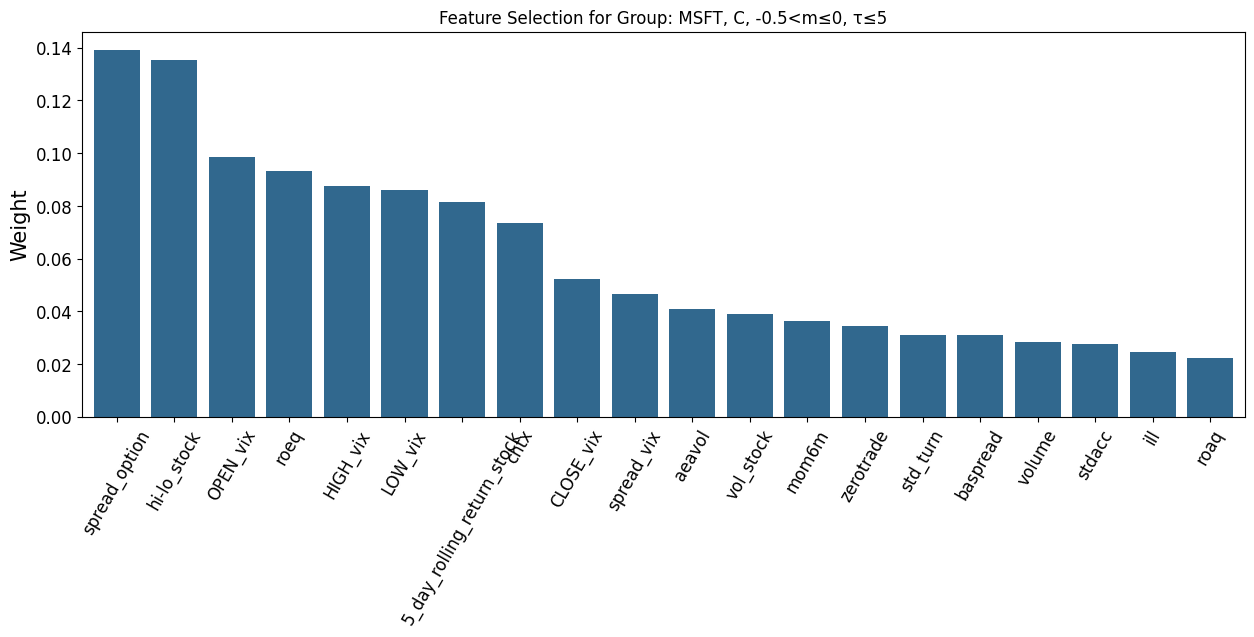

Selected features for group MSFT, C, -0.5<m≤0, τ≤5: ['5_day_rolling_return_stock' 'CLOSE_vix' 'FF_rate' 'HIGH_vix' 'LOW_vix'
 'OPEN_vix' 'aeavol' 'agr' 'baspread' 'chcsho' 'chtx' 'cinvest'
 'daily_return_indicator_stock' 'hi-lo_stock' 'idiovol' 'ill' 'mom12m'
 'mom6m' 'operprof' 'rd_sale' 'roaq' 'roeq' 'salerec' 'spread_option'
 'spread_vix' 'std_turn' 'stdacc' 'vol_stock' 'volume' 'zerotrade']
Best alpha: 0.12328467394420634, Best l1_ratio: 0.1111111111111111


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.90060710494218, tolerance: 0.04516815935244653
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/

Index(['10Y_RIR', '1Y_bond', '2Y_bond', '5_day_rolling_return_stock',
       'CLOSE_vix', 'FF_rate', 'HIGH_vix', 'LOW_vix', 'OPEN_vix', 'absacc',
       ...
       'std_dolvol', 'std_turn', 'stdacc', 'stdcf', 'tang', 'tb', 'turn',
       'vol_stock', 'volume', 'zerotrade'],
      dtype='object', length=106)


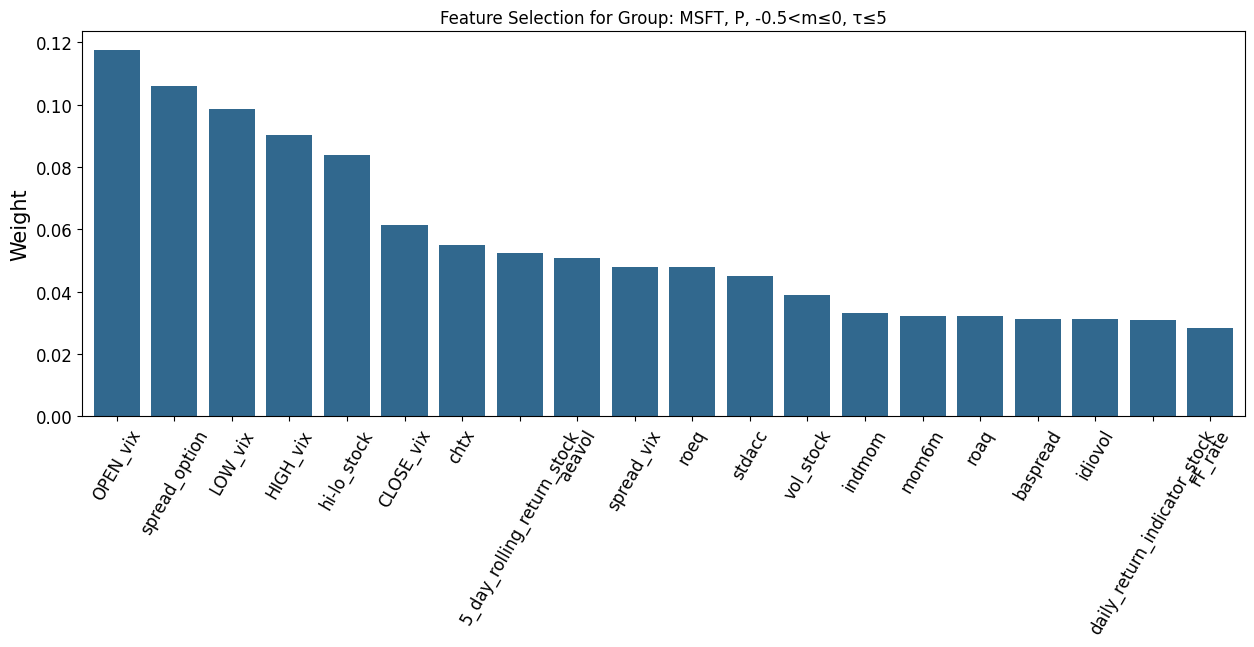

Selected features for group MSFT, P, -0.5<m≤0, τ≤5: ['10Y_RIR' '1Y_bond' '2Y_bond' '5_day_rolling_return_stock' 'CLOSE_vix'
 'FF_rate' 'HIGH_vix' 'LOW_vix' 'OPEN_vix' 'absacc' 'acc' 'aeavol' 'age'
 'agr' 'baspread' 'beta' 'betasq' 'bm' 'bm_ia' 'cash' 'cashdebt' 'cashpr'
 'cfp' 'cfp_ia' 'chatoia' 'chcsho' 'chempia' 'chinv' 'chmom' 'chpmia'
 'chtx' 'cinvest' 'currat' 'daily_return_indicator_stock' 'depr' 'dolvol'
 'dy' 'ear' 'egr' 'ep' 'gma' 'gold_price' 'grcapx' 'grltnoa' 'herf'
 'hi-lo_stock' 'hire' 'idiovol' 'ill' 'indmom' 'invest' 'lev' 'lgr'
 'maxret' 'mom12m' 'mom1m' 'mom36m' 'mom6m' 'mve_ia' 'mvel1' 'nincr'
 'open_interest' 'operprof' 'orgcap' 'pchcapx_ia' 'pchcurrat' 'pchdepr'
 'pchgm_pchsale' 'pchquick' 'pchsale_pchinvt' 'pchsale_pchrect'
 'pchsale_pchxsga' 'pchsaleinv' 'pctacc' 'pricedelay' 'ps' 'quick'
 'rd_mve' 'rd_sale' 'realestate' 'reces_indi' 'retvol' 'roaq' 'roavol'
 'roeq' 'roic' 'rsup' 'salecash' 'saleinv' 'salerec' 'secured' 'sgr' 'sp'
 'spread_option' 'spread_stock' 

In [33]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import logging

# Suppress font warnings
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

def feature_selection(IV, data, ticker, cp_flag, m_category, maturity_group):
    """
    Perform feature selection using ElasticNet regression for a specific group.

    Parameters:
    IV (str): The name of the independent variable to predict.
    data (pd.DataFrame): The dataset containing the features and the independent variable.
    ticker (str): The ticker for the group.
    cp_flag (str): The cp_flag for the group.
    m_category (str): The m_category for the group.
    maturity_group (str): The maturity_group for the group.

    Returns:
    np.ndarray: The selected features.
    """
    # Separate the independent variable and the features
    data_y = data[IV]
    features = data.iloc[:, 5:]

    # Define the range for alpha and l1_ratio
    alphas = np.logspace(-10, 0, 100)
    l1_ratios = np.linspace(0, 1, 10)

    # Initialize and fit the ElasticNetCV model
    enet_cv_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)
    enet_cv_model.fit(features, data_y)

    # Get the best parameters
    best_alpha = enet_cv_model.alpha_
    best_l1_ratio = enet_cv_model.l1_ratio_

    # Get the coefficients from the model
    coef = enet_cv_model.coef_

    # Identify features with zero coefficients
    zero_features = np.where(coef == 0)[0]

    # Select features with non-zero coefficients
    mask = coef != 0
    selected_features = features.columns[mask]
    print(selected_features)

    # Create a DataFrame for the feature importances
    features_elnet = pd.DataFrame(data=np.absolute(coef[mask]), columns=["Importance"])
    features_elnet.index = selected_features

    # Sort the features by importance
    sorted_features_elnet = features_elnet.sort_values(by="Importance", ascending=False)

    # Select top 20 features if more than 20 are selected
    if sorted_features_elnet.shape[0] > 20:
        sorted_features_elnet = sorted_features_elnet.head(20)

    # Plot the feature importances
    colors = cm.viridis(np.linspace(0, 1, 7))
    font_name = 'Liberation Serif'
    plt.figure(figsize=(15, 5))
    plt.bar(sorted_features_elnet.index, sorted_features_elnet["Importance"], color=colors[2])
    plt.ylabel("Weight", fontsize=15, fontname=font_name)
    plt.xticks(rotation=60, fontname=font_name, fontsize=12)
    plt.yticks(fontname=font_name, fontsize=12)
    plt.margins(x=0.01)
    plt.title(f"Feature Selection for Group: {ticker}, {cp_flag}, {m_category}, {maturity_group}")
    plt.show()

    return selected_features.to_numpy(), coef, best_alpha, best_l1_ratio

# Define the file path for the CSV file
csv_file_path = '/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Features/features1.csv'

# Create a new file or overwrite an existing one
with open(csv_file_path, 'w') as f:
    f.write('Ticker,cp_flag,m_category,maturity_group,alpha,l1_ratio,' + ','.join(total_train.columns[5:]) + '\n')

# Get unique tickers, cp_flags, m_categories, and maturity_groups
unique_tickers = total_train['Ticker'].unique()
unique_cp_flags = total_train['cp_flag'].unique()
unique_m_categories = total_train['m_category'].unique()
unique_maturity_groups = total_train['maturity_group'].unique()

# Loop through each group and perform feature selection
for ticker in unique_tickers:
    for cp_flag in unique_cp_flags:
        for m_category in unique_m_categories:
            for maturity_group in unique_maturity_groups:
                # Filter data for the current group
                group_data = total_train[
                    (total_train['Ticker'] == ticker) &
                    (total_train['cp_flag'] == cp_flag) &
                    (total_train['m_category'] == m_category) &
                    (total_train['maturity_group'] == maturity_group)
                ]

                if not group_data.empty:
                    selected_features, coeff, best_alpha, best_l1_ratio = feature_selection('impl_volatility', group_data, ticker, cp_flag, m_category, maturity_group)
                    print(f"Selected features for group {ticker}, {cp_flag}, {m_category}, {maturity_group}: {selected_features}")
                    print(f"Best alpha: {best_alpha}, Best l1_ratio: {best_l1_ratio}")

                    # Append the selected features and their importances to the CSV file
                    with open(csv_file_path, 'a') as f:
                        f.write(f'{ticker},{cp_flag},{m_category},{maturity_group},{best_alpha},{best_l1_ratio},' + ','.join(map(str, coeff)) + '\n')


In [40]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import ElasticNet
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# # Suppress font warnings
# logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# def feature_selection(IV, data, l1_ratio, ticker, cp_flag, m_category, maturity_group):
#     """
#     Perform feature selection using ElasticNet regression for a specific group.

#     Parameters:
#     IV (str): The name of the independent variable to predict.
#     data (pd.DataFrame): The dataset containing the features and the independent variable.
#     l1_ratio (float): The mixing parameter between L1 and L2 regularization.
#     ticker (str): The ticker for the group.
#     cp_flag (str): The cp_flag for the group.
#     m_category (str): The m_category for the group.
#     maturity_group (str): The maturity_group for the group.

#     Returns:
#     np.ndarray: The selected features.
#     """
#     # Separate the independent variable and the features
#     data_y = data[IV]
#     features = data.iloc[:, 5:]

#     # Initialize and fit the ElasticNet model
#     enet_model = ElasticNet(alpha=0.5, l1_ratio=l1_ratio)
#     enet_model.fit(features, data_y)

#     # Get the coefficients from the model
#     coef = enet_model.coef_

#     # Identify features with zero coefficients
#     zero_features = np.where(coef == 0)[0]
#     # print(f"Number of features set to zero for {IV} in group {ticker}, {cp_flag}, {m_category}, {maturity_group}: {zero_features.shape[0]}")
#     # print(f"{features.shape[1] - zero_features.shape[0]} features remaining.")

#     # Select features with non-zero coefficients
#     mask = coef != 0
#     selected_features = features.columns[mask]
#     print(selected_features)

#     # Create a DataFrame for the feature importances
#     features_elnet = pd.DataFrame(data=np.absolute(coef[mask]), columns=["Importance"])
#     features_elnet.index = selected_features

#     # Sort the features by importance
#     sorted_features_elnet = features_elnet.sort_values(by="Importance", ascending=False)

#     # Plot the feature importances
#     colors = cm.viridis(np.linspace(0, 1, 7))
#     font_name = 'Liberation Serif'
#     plt.figure(figsize=(15, 5))
#     plt.bar(sorted_features_elnet.index, sorted_features_elnet["Importance"], color=colors[2])
#     plt.ylabel("Weight", fontsize=15, fontname=font_name)
#     plt.xticks(rotation=60, fontname=font_name, fontsize=12)
#     plt.yticks(fontname=font_name, fontsize=12)
#     plt.margins(x=0.01)
#     plt.title(f"Feature Selection for Group: {ticker}, {cp_flag}, {m_category}, {maturity_group}")
#     plt.show()

#     return selected_features.to_numpy(), coef

# # Define the file path for the CSV file
# csv_file_path = '/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Features/features1.csv'

# # Create a new file or overwrite an existing one
# with open(csv_file_path, 'w') as f:
#     f.write('Ticker,cp_flag,m_category,maturity_group,' + ','.join(total_train.columns[5:]) + '\n')


# # Get unique tickers, cp_flags, m_categories, and maturity_groups
# unique_tickers = total_train['Ticker'].unique()
# unique_cp_flags = total_train['cp_flag'].unique()
# unique_m_categories = total_train['m_category'].unique()
# unique_maturity_groups = total_train['maturity_group'].unique()

# # Loop through each group and perform feature selection
# for ticker in unique_tickers:
#     for cp_flag in unique_cp_flags:
#         for m_category in unique_m_categories:
#             for maturity_group in unique_maturity_groups:
#                 # Filter data for the current group
#                 group_data = total_train[
#                     (total_train['Ticker'] == ticker) &
#                     (total_train['cp_flag'] == cp_flag) &
#                     (total_train['m_category'] == m_category) &
#                     (total_train['maturity_group'] == maturity_group)
#                 ]

#                 if not group_data.empty:
#                     selected_features, coeff = feature_selection('impl_volatility', group_data, 0.14, ticker, cp_flag, m_category, maturity_group)
#                     print(f"Selected features for group {ticker}, {cp_flag}, {m_category}, {maturity_group}: {selected_features}")

#                      # Append the selected features and their importances to the CSV file
#                     # Append the selected features and their importances to the CSV file
#                     with open(csv_file_path, 'a') as f:
#                         f.write(f'{ticker},{cp_flag},{m_category},{maturity_group},' + ','.join(map(str, coeff)) + '\n')

In [35]:
# level_features = np.loadtxt('/content/drive/MyDrive/Msc Thesis/code/Feature selection/level_f.csv', dtype='str').tolist()
# slope_features = np.loadtxt('/content/drive/MyDrive/Msc Thesis/code/Feature selection/slope_f.csv', dtype='str').tolist()
# curve_features = np.loadtxt('/content/drive/MyDrive/Msc Thesis/code/Feature selection/curve_f.csv', dtype='str').tolist()

In [36]:
# features = np.loadtxt('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Features/features.csv', dtype='str', delimiter=',', skiprows=1).tolist()
# features

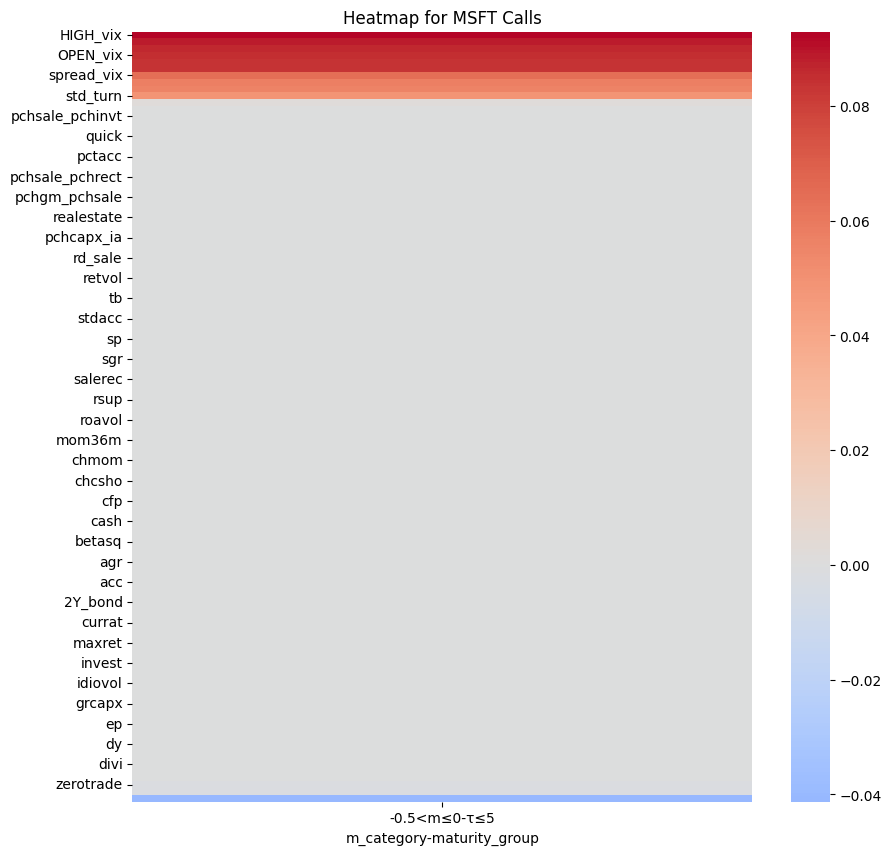

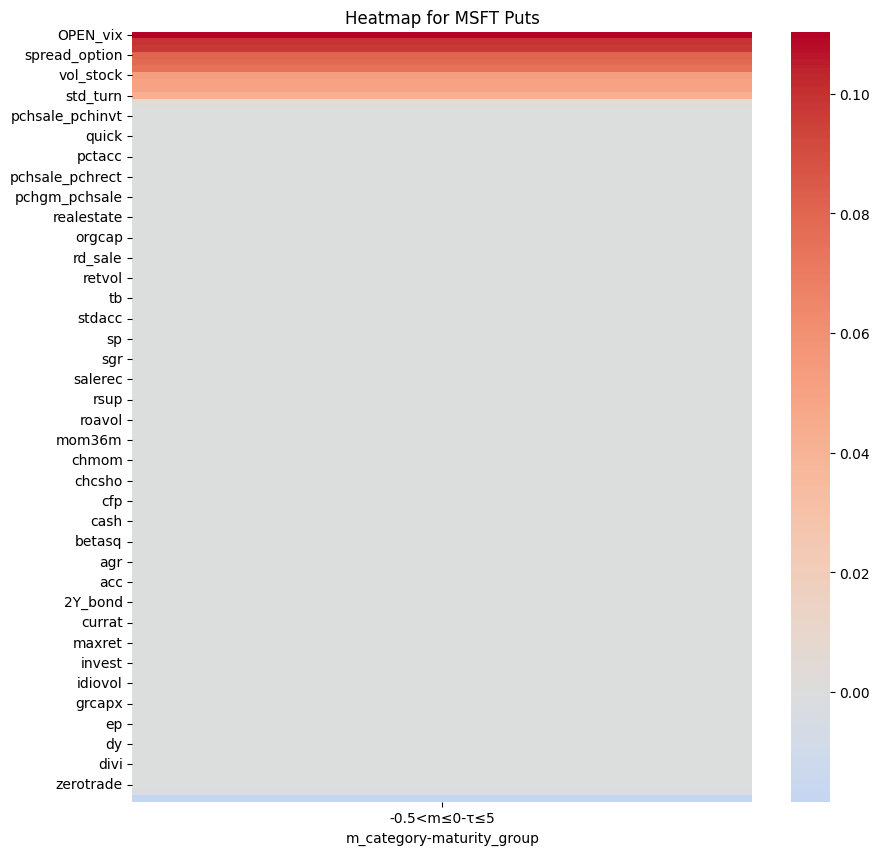

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Features/features1.csv')

# Separate the data for calls and puts
df_calls = df[df['cp_flag'] == 'C']
df_puts = df[df['cp_flag'] == 'P']

# Group the data by ticker, m_category, and maturity_group, and calculate the mean of the numeric features
df_calls_grouped = df_calls.groupby(['Ticker', 'm_category', 'maturity_group']).mean(numeric_only=True)
df_puts_grouped = df_puts.groupby(['Ticker', 'm_category', 'maturity_group']).mean(numeric_only=True)

# Create a heatmap for each ticker
for ticker in df['Ticker'].unique():
    # Calculate the mean of each feature and sort the features
    df_calls_sorted = df_calls_grouped.loc[ticker].mean().sort_values(ascending=False)
    df_puts_sorted = df_puts_grouped.loc[ticker].mean().sort_values(ascending=False)

    # Create the heatmaps
    plt.figure(figsize=(10, 10))
    plt.title(f'Heatmap for {ticker} Calls')
    sns.heatmap(df_calls_grouped.loc[ticker][df_calls_sorted.index].T, cmap='coolwarm', center=0)
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.title(f'Heatmap for {ticker} Puts')
    sns.heatmap(df_puts_grouped.loc[ticker][df_puts_sorted.index].T, cmap='coolwarm', center=0)
    plt.show()

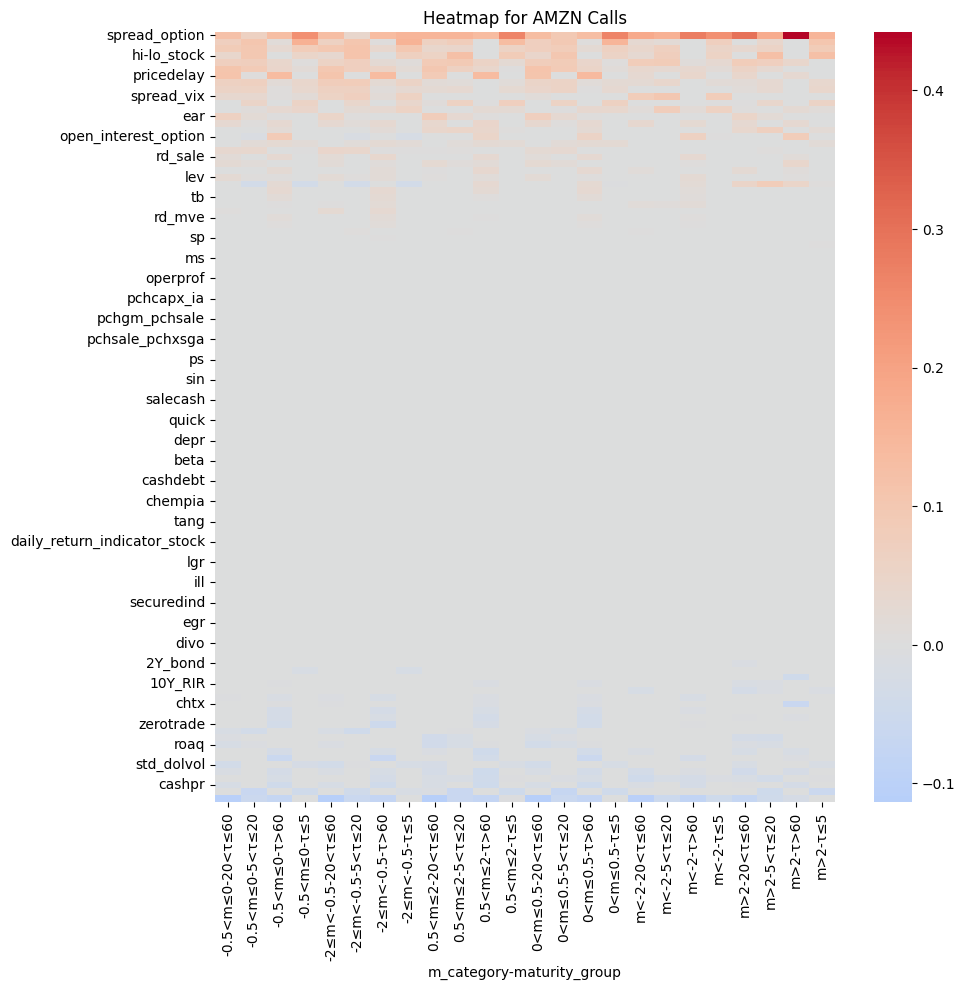

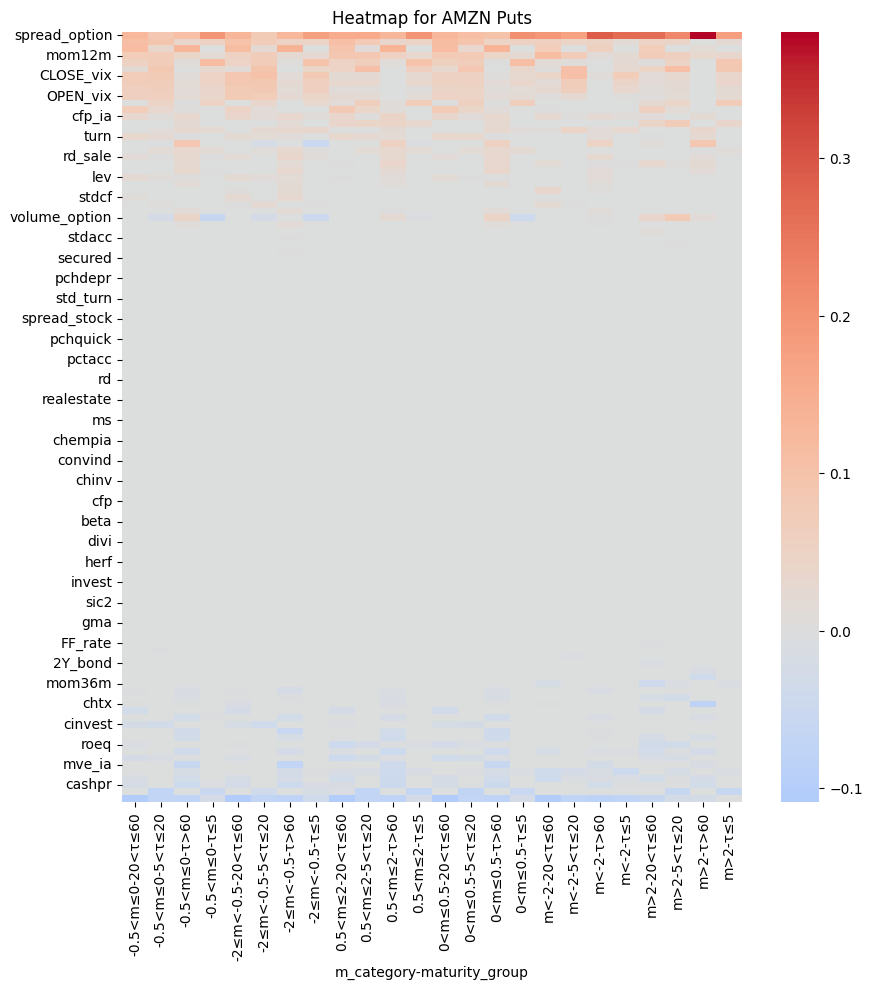

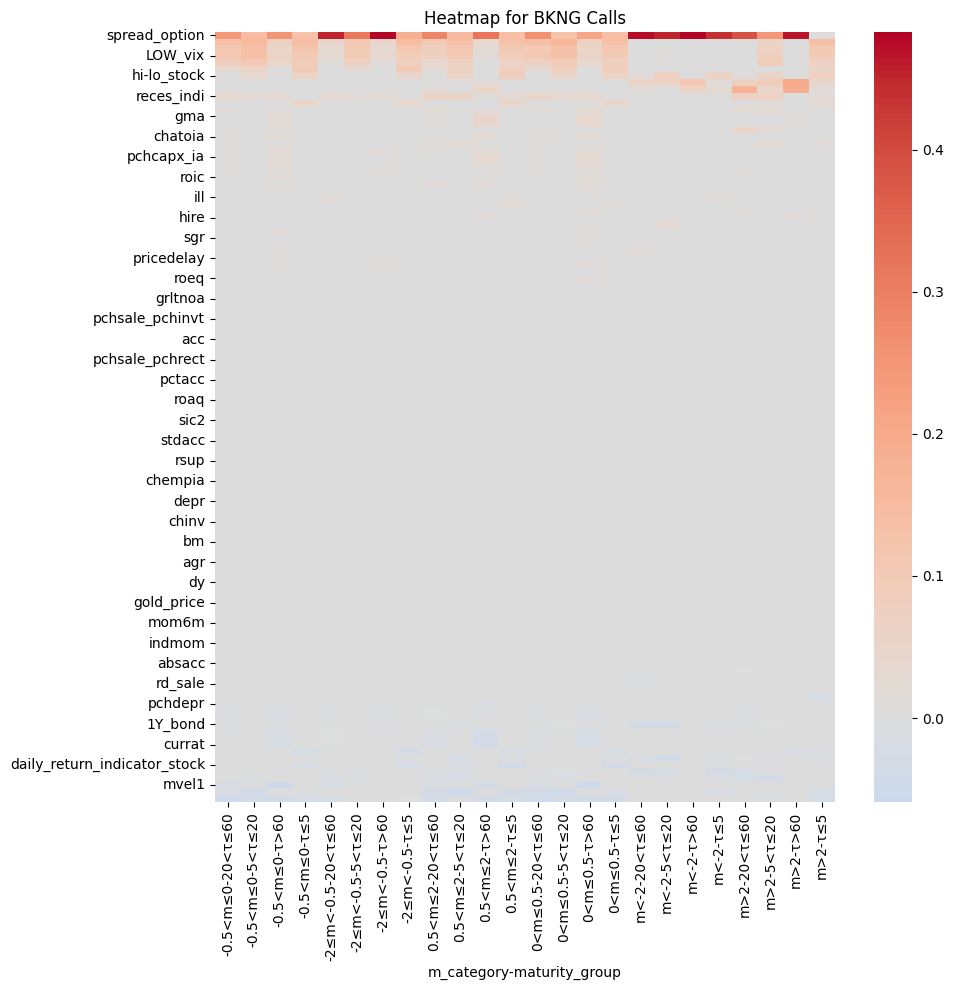

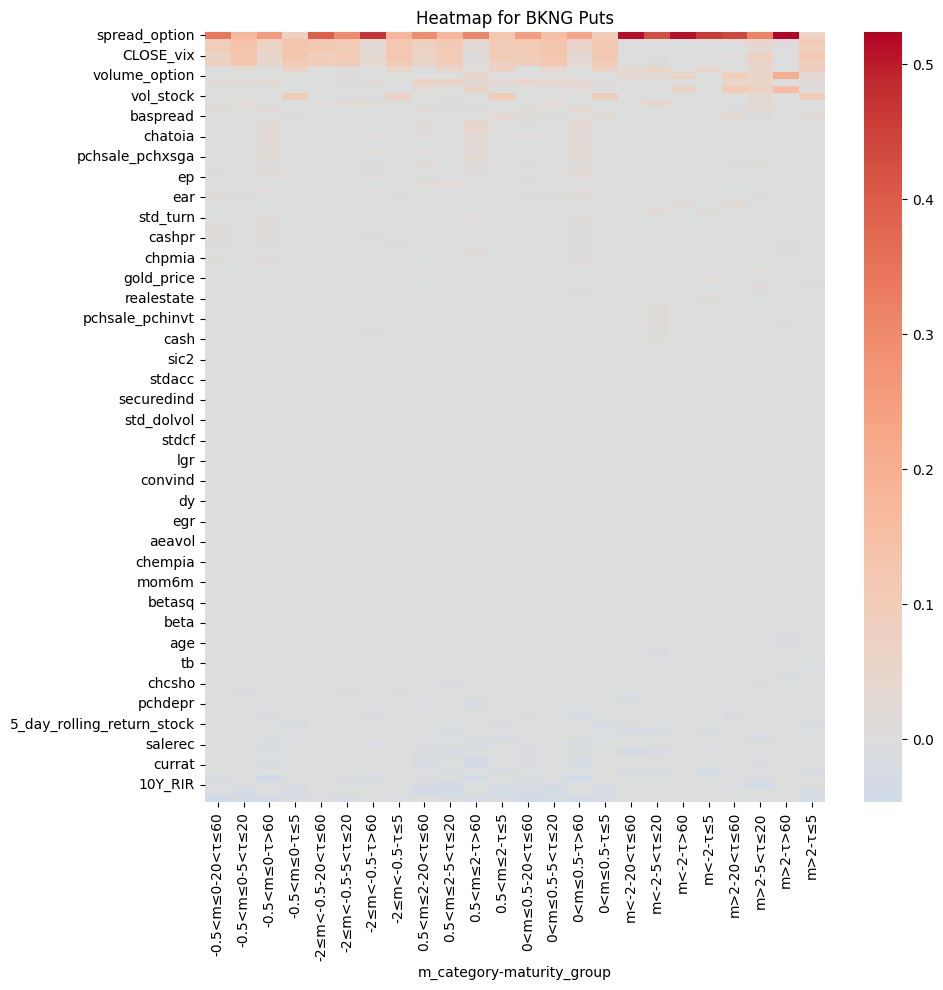

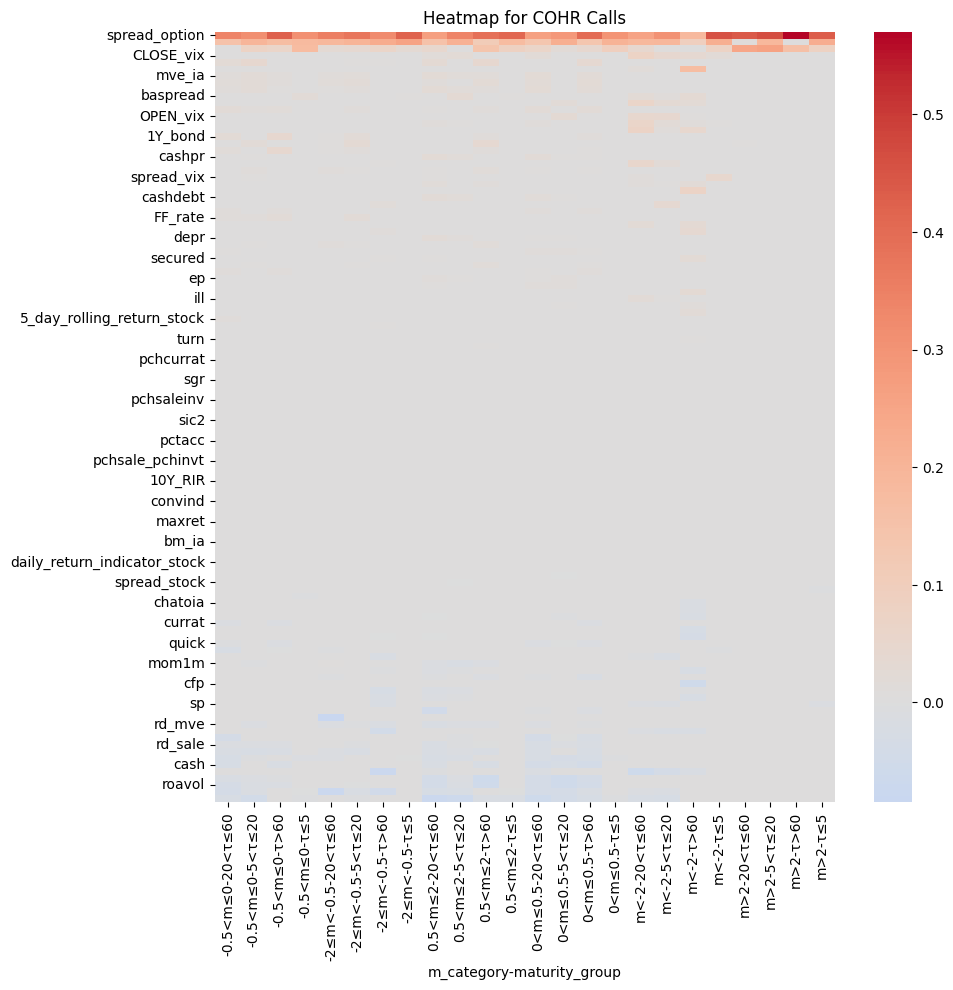

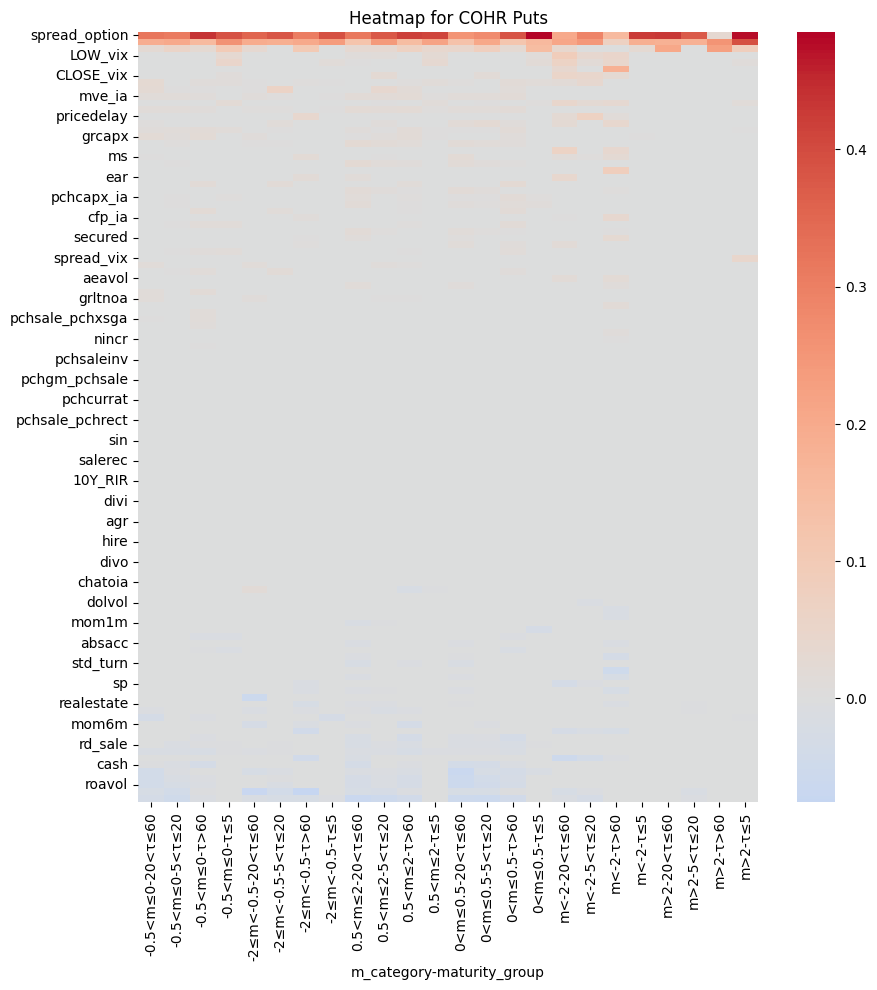

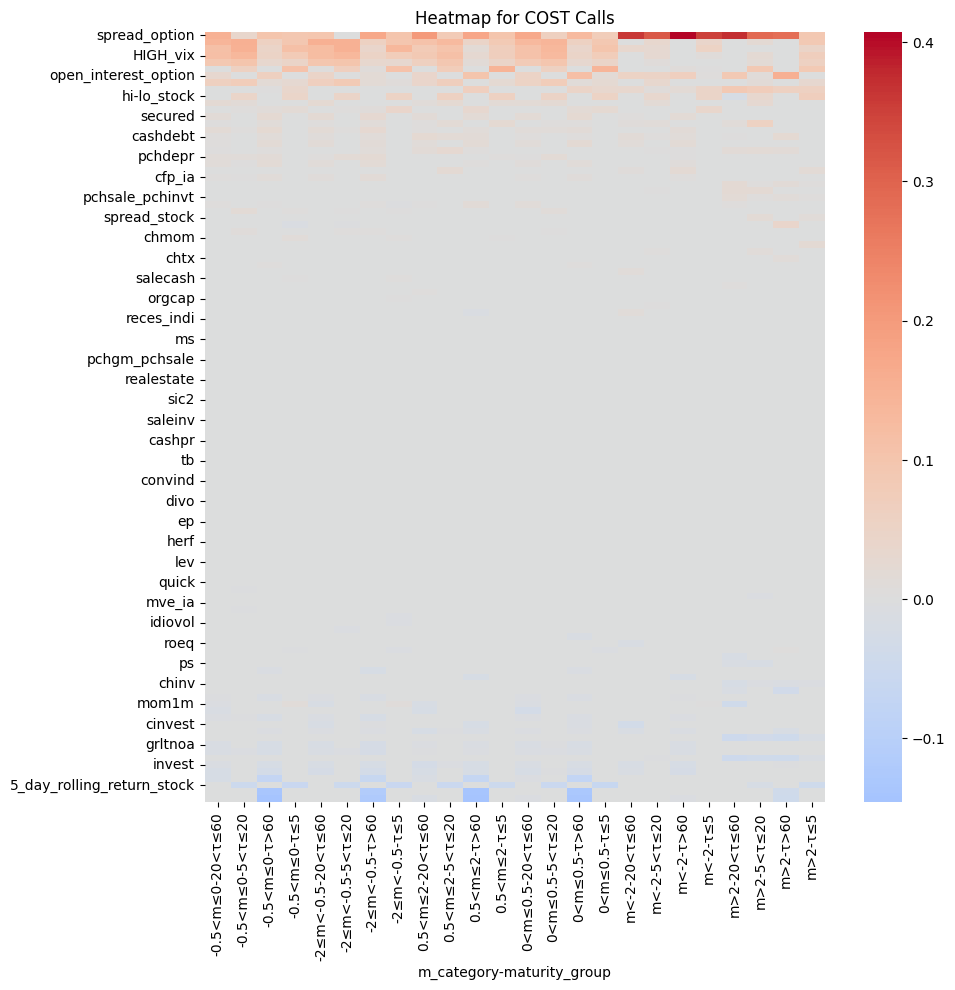

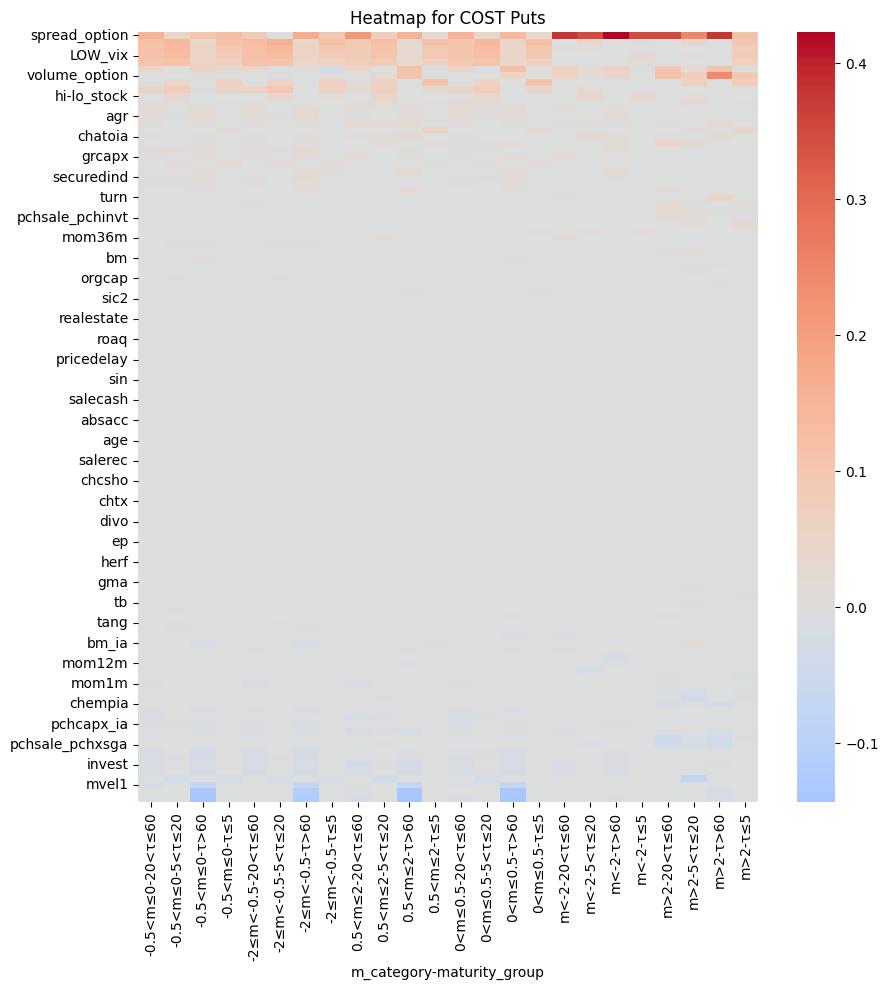

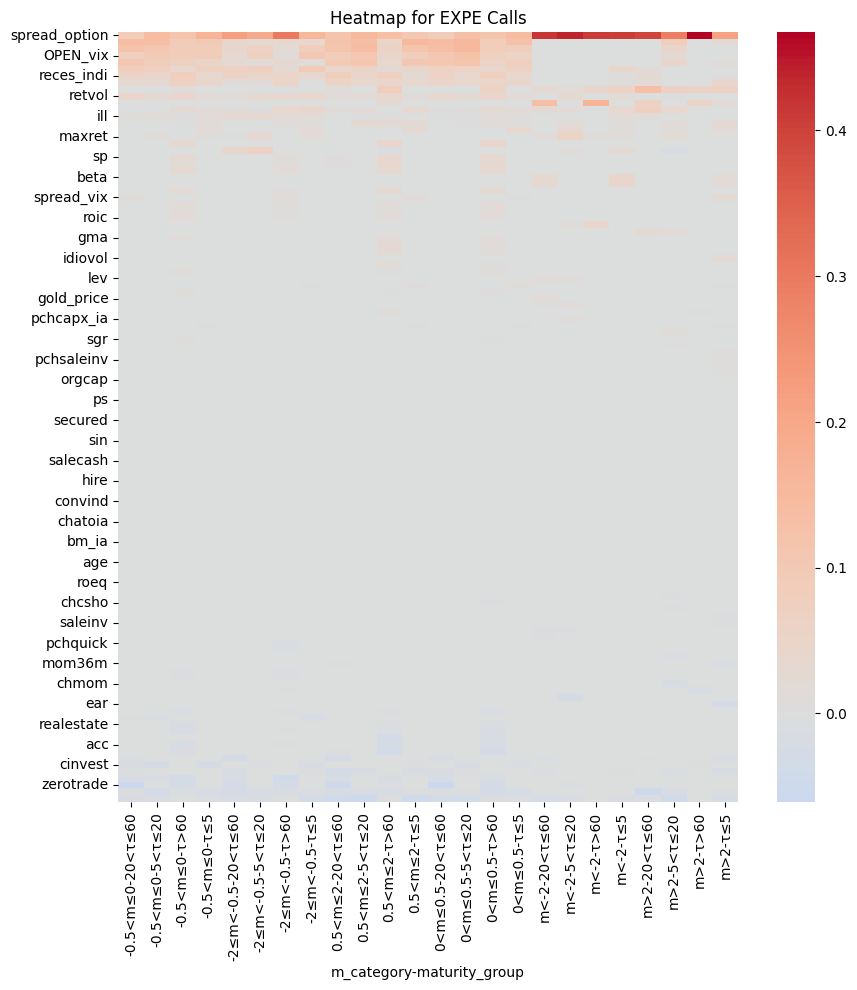

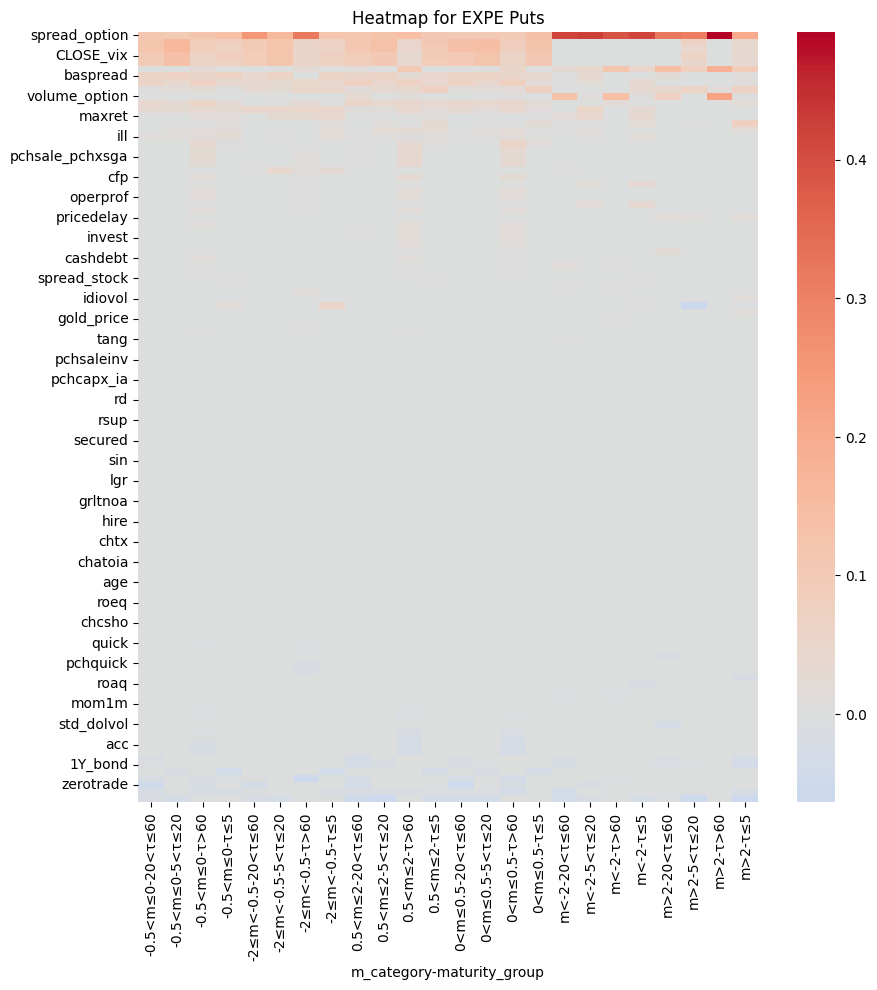

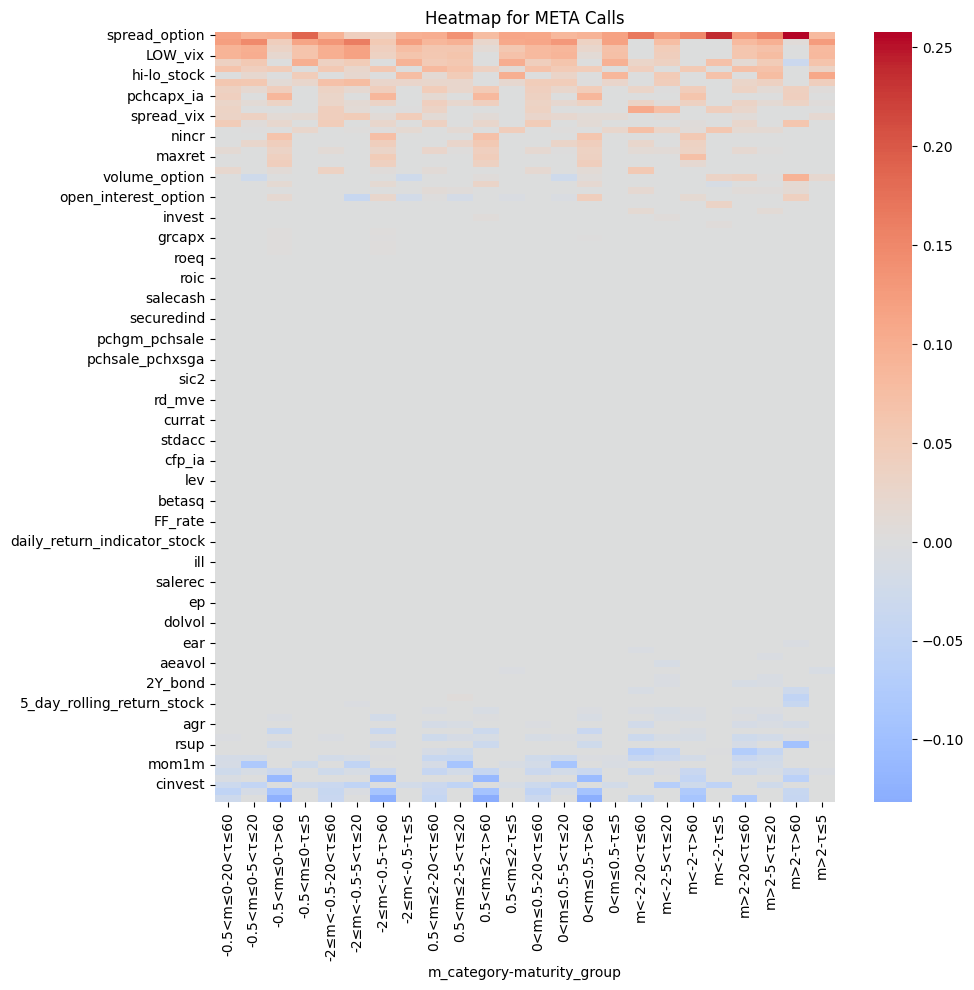

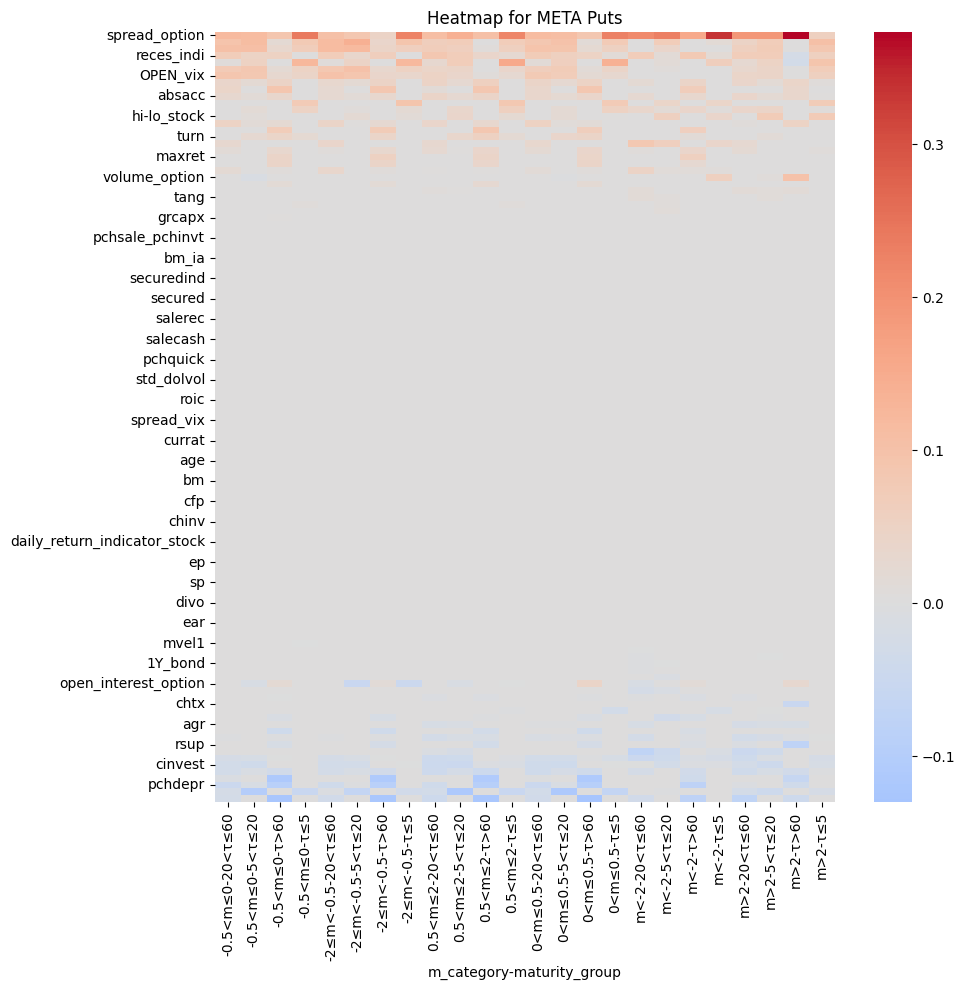

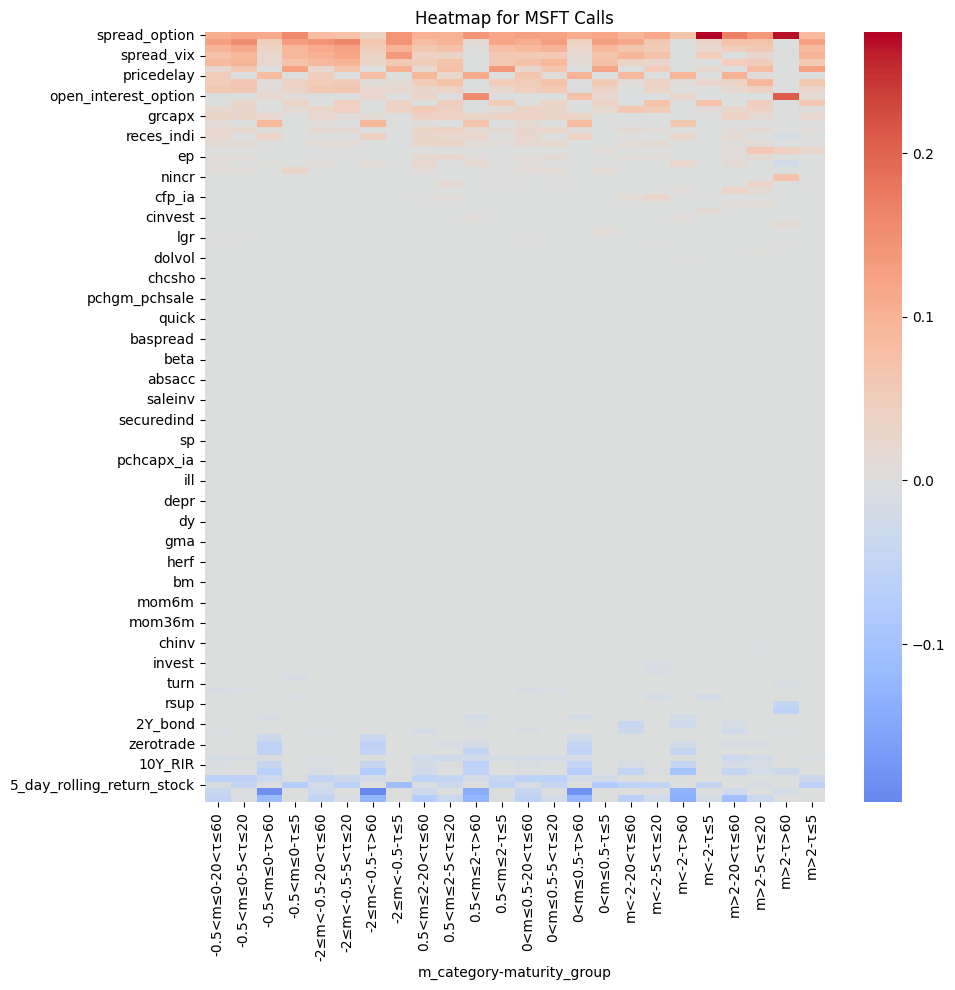

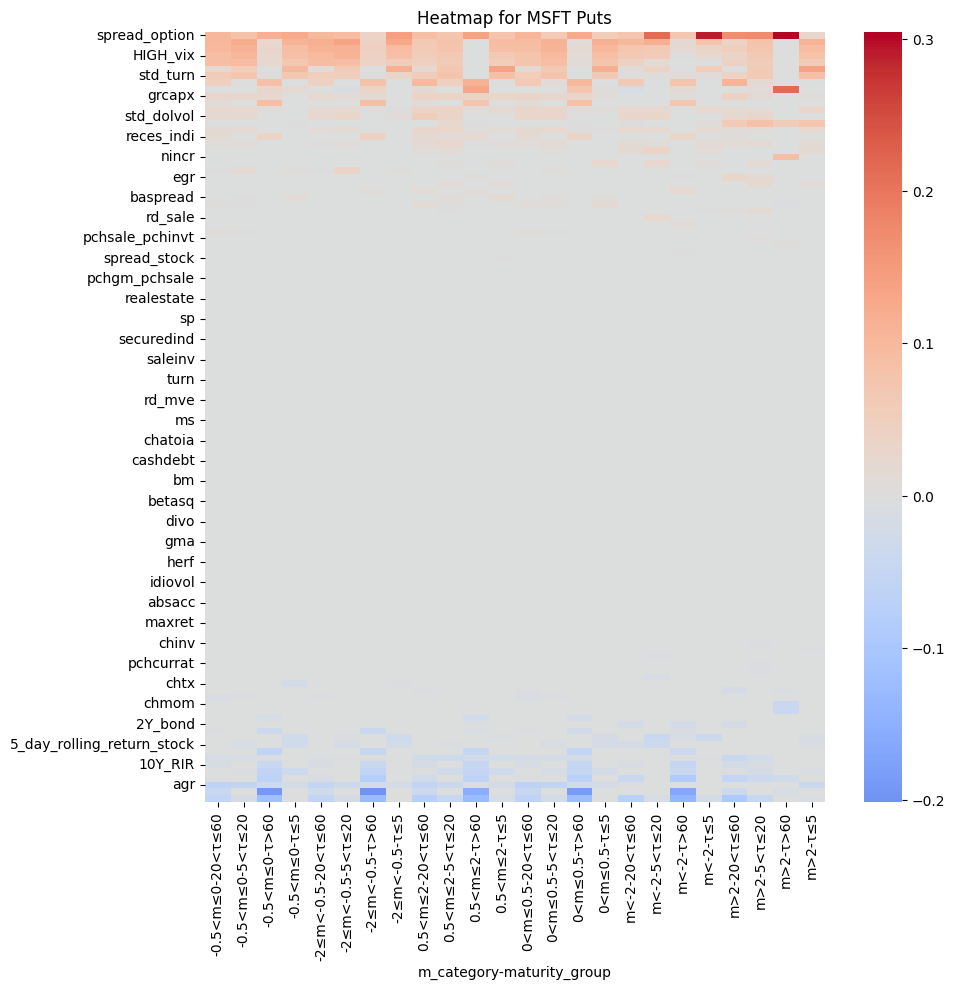

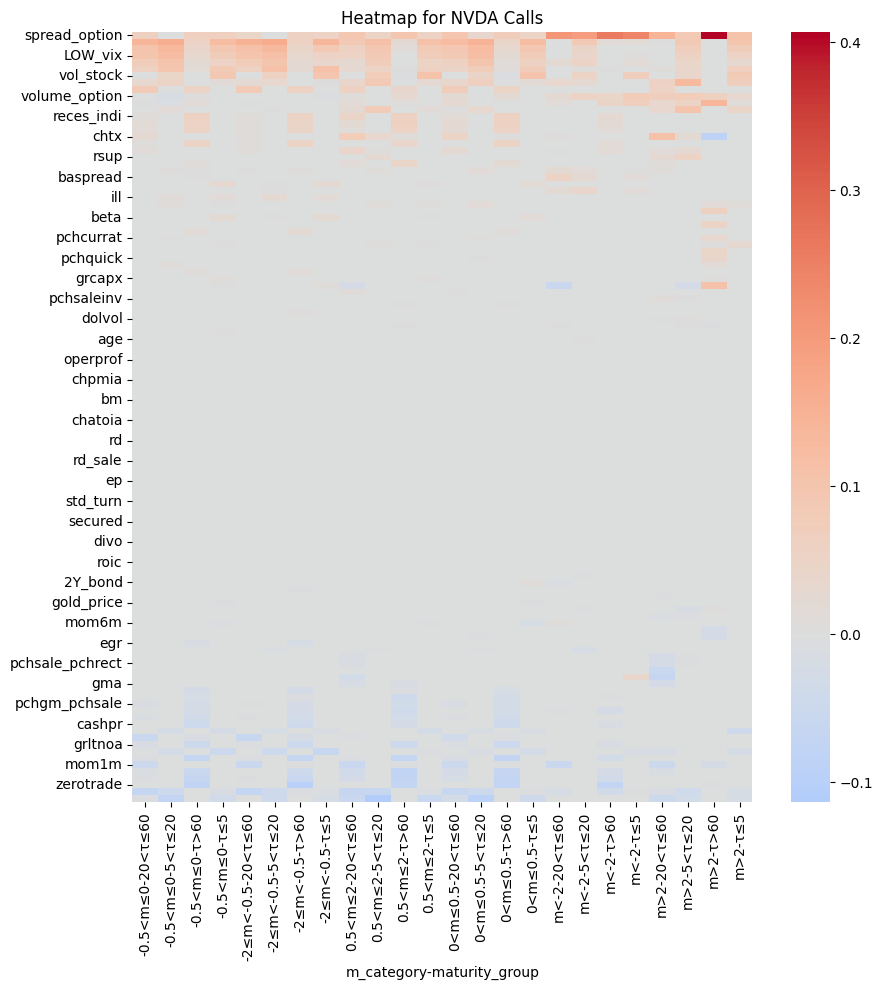

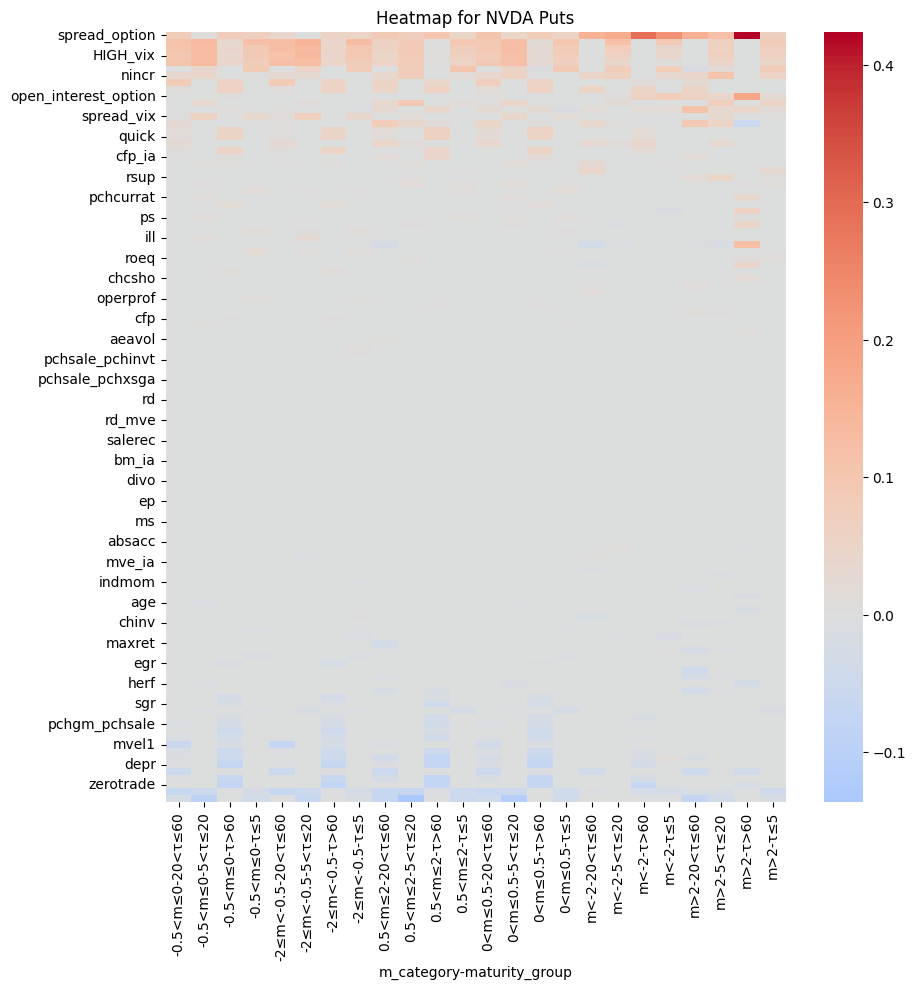

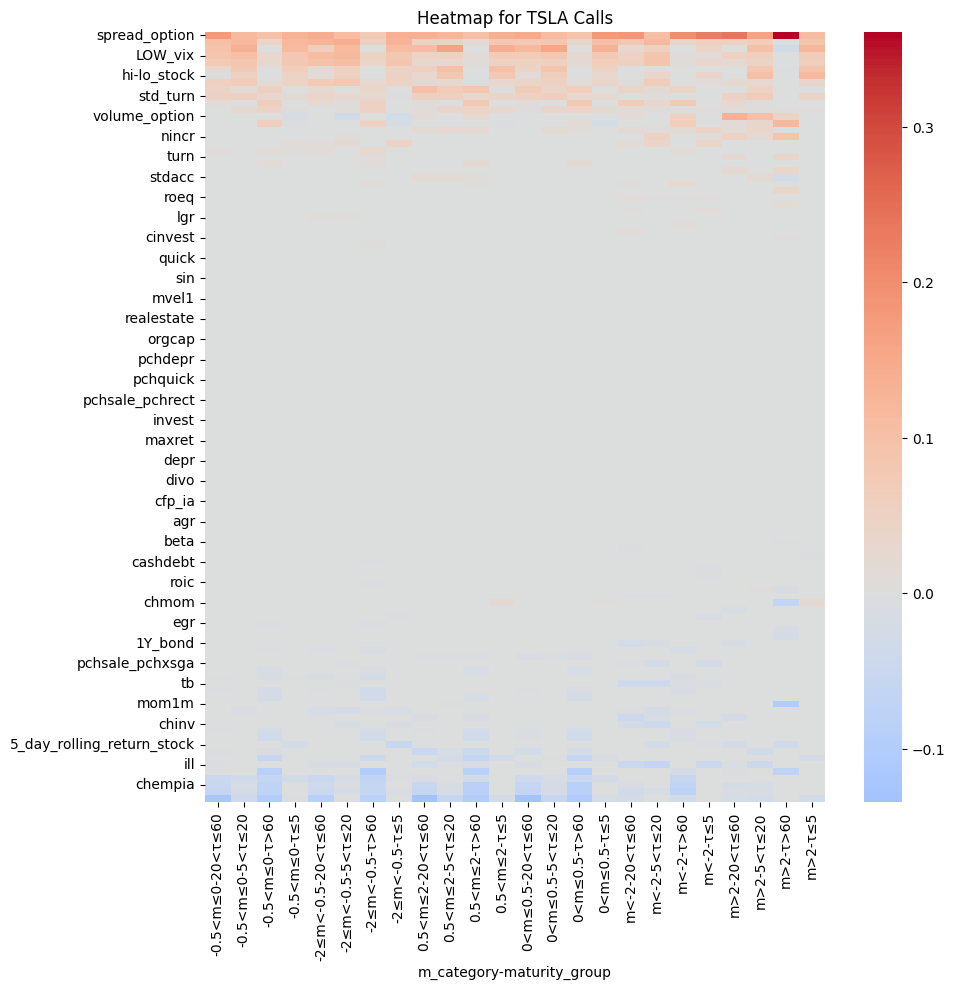

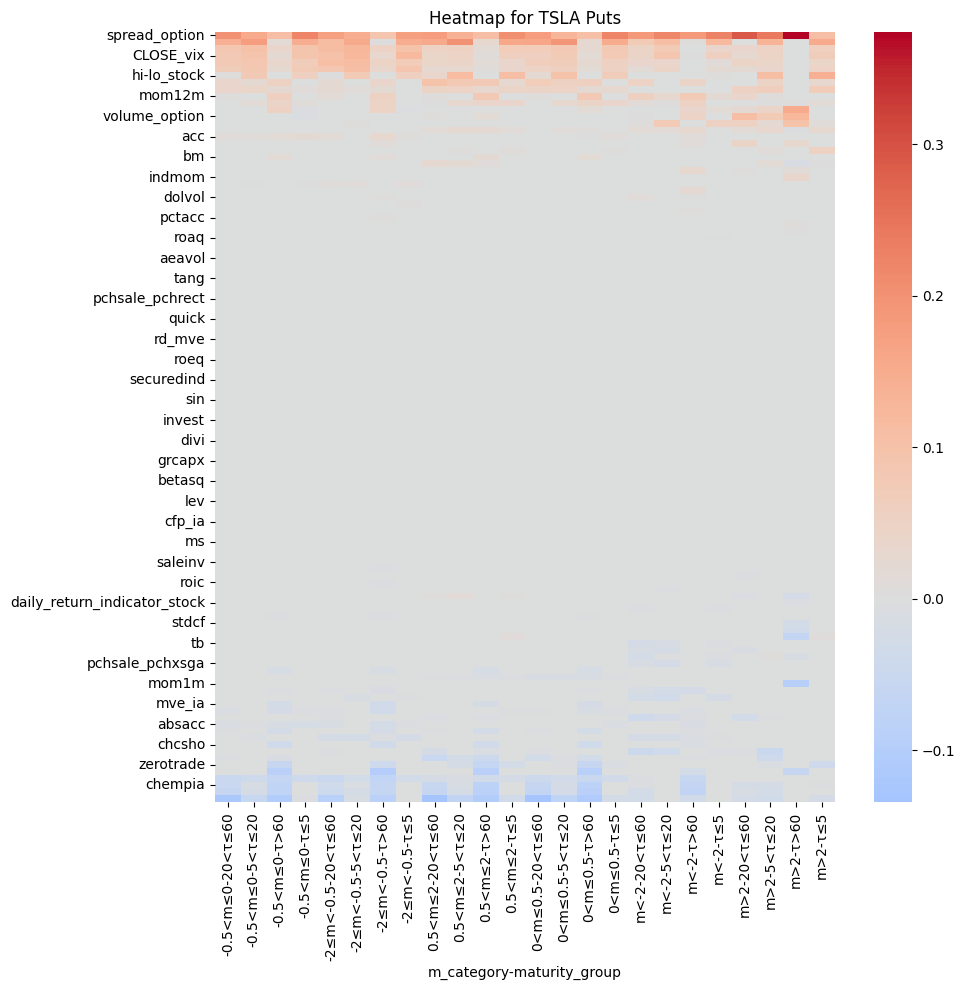

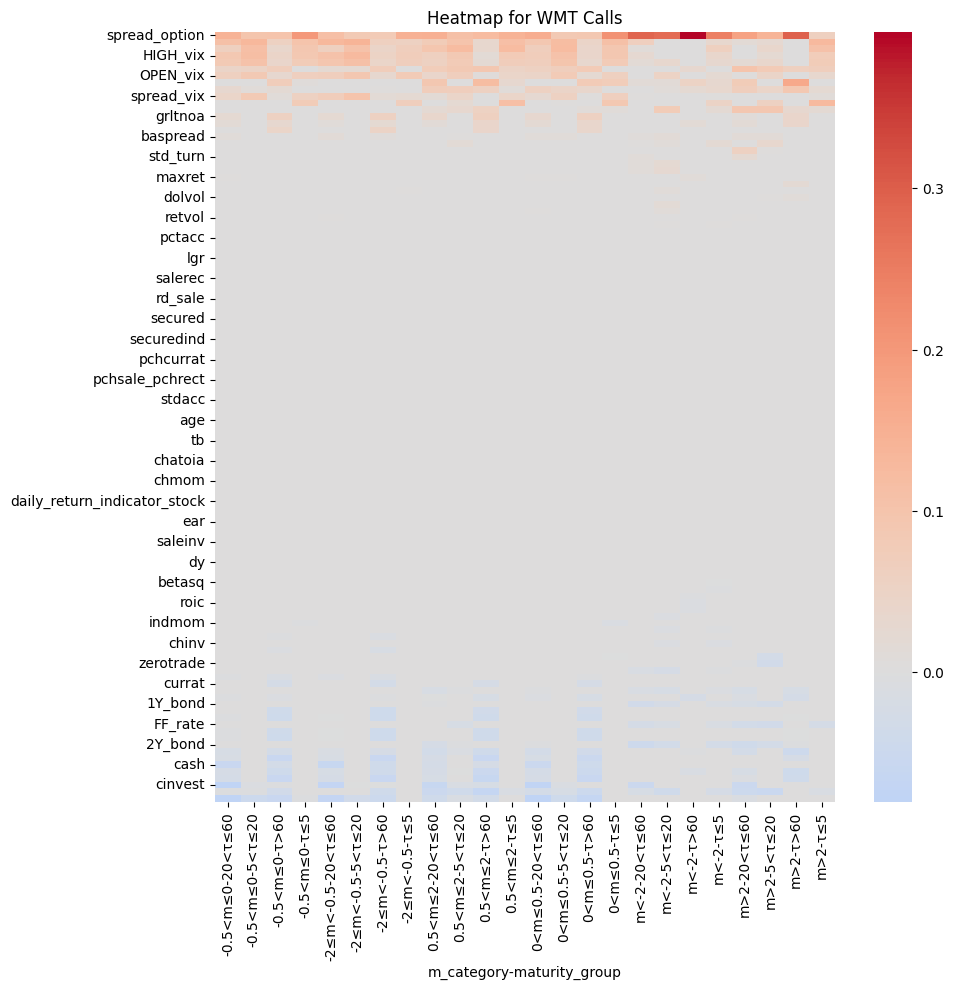

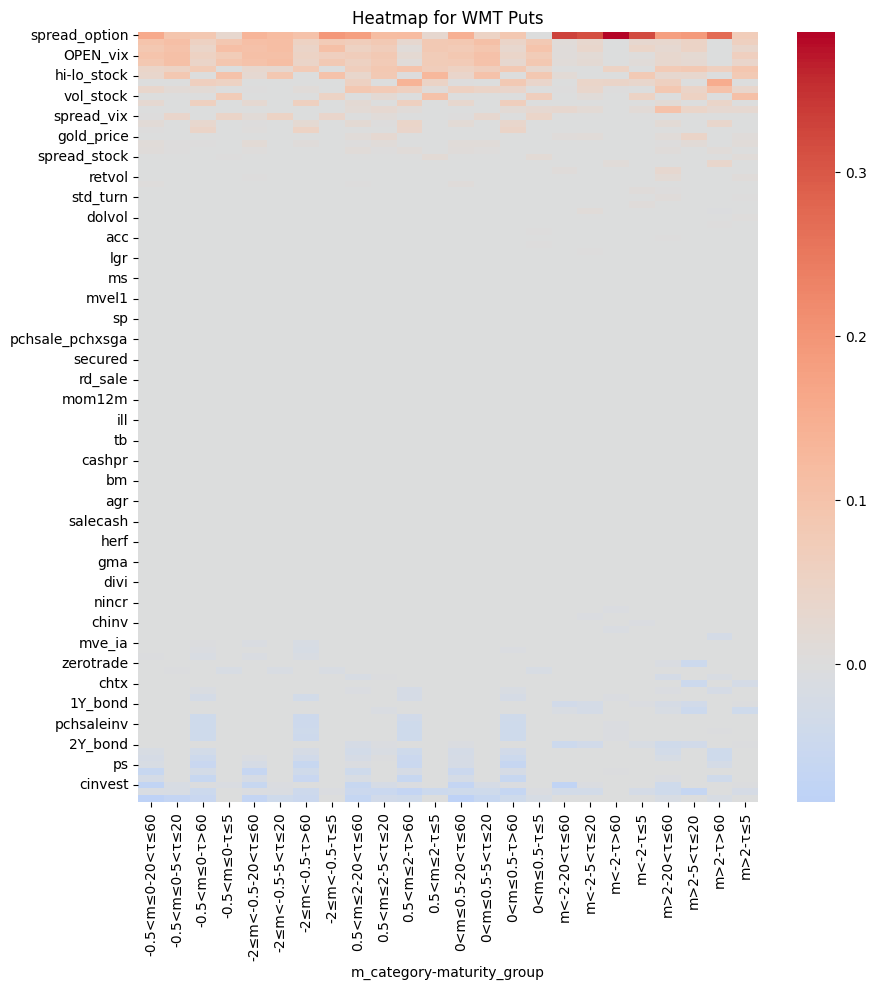

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Features/features.csv')

# Separate the data for calls and puts
df_calls = df[df['cp_flag'] == 'C']
df_puts = df[df['cp_flag'] == 'P']

# Group the data by ticker, m_category, and maturity_group, and calculate the mean of the numeric features
df_calls_grouped = df_calls.groupby(['Ticker', 'm_category', 'maturity_group']).mean(numeric_only=True)
df_puts_grouped = df_puts.groupby(['Ticker', 'm_category', 'maturity_group']).mean(numeric_only=True)

# Create a heatmap for each ticker
for ticker in df['Ticker'].unique():
    # Calculate the mean of each feature and sort the features
    df_calls_sorted = df_calls_grouped.loc[ticker].mean().sort_values(ascending=False)
    df_puts_sorted = df_puts_grouped.loc[ticker].mean().sort_values(ascending=False)

    # Create the heatmaps
    plt.figure(figsize=(10, 10))
    plt.title(f'Heatmap for {ticker} Calls')
    sns.heatmap(df_calls_grouped.loc[ticker][df_calls_sorted.index].T, cmap='coolwarm', center=0)
    plt.show()

    plt.figure(figsize=(10, 10))
    plt.title(f'Heatmap for {ticker} Puts')
    sns.heatmap(df_puts_grouped.loc[ticker][df_puts_sorted.index].T, cmap='coolwarm', center=0)
    plt.show()

Create standardised datasets for level, slope and curvature

In [39]:
data_level = data[data.columns[:8].tolist() + level_features]
data_slope = data[data.columns[:8].tolist() + slope_features]
data_curve = data[data.columns[:8].tolist() + curve_features]

data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_standardized.csv', index=True)
data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_standardized.csv', index=True)
data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_standardized.csv', index=True)

NameError: name 'level_features' is not defined

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_standardized_selection10.csv')
data.index = data["date"]
data.index = pd.to_datetime(data.index)
data.drop(columns=["date"], inplace=True)

data_level = data[data.columns[:8].tolist() + level_features.tolist()]
data_slope = data[data.columns[:8].tolist() + slope_features.tolist()]
data_curve = data[data.columns[:8].tolist() + curve_features.tolist()]

# data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_standardized_dum_20.csv', index=True)
# data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_standardized_dum_20.csv', index=True)
# data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_standardized_dum_20.csv', index=True)

# data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_standardized_pp_nosic.csv', index=True)
# data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_standardized_pp_nosic.csv', index=True)
# data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_standardized_pp_nosic.csv', index=True)

data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_standardized_selection10.csv', index=True)
data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_standardized_selection10.csv', index=True)
data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_standardized_selection10.csv', index=True)

Create mapped datasets for level, slope and curvature

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_mapped.csv')
data.index = data["date"]
data.index = pd.to_datetime(data.index)
data.drop(columns=["date"], inplace=True)

data_level = data[data.columns[:8].tolist() + level_features]
data_slope = data[data.columns[:8].tolist() + slope_features]
data_curve = data[data.columns[:8].tolist() + curve_features]

data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_mapped.csv', index=True)
data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_mapped.csv', index=True)
data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_mapped.csv', index=True)

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_mapped_dum.csv')
# data = pd.read_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_mapped_pp_nosic.csv')
data = pd.read_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_mapped_selection10.csv')
data.index = data["date"]
data.index = pd.to_datetime(data.index)
data.drop(columns=["date"], inplace=True)

data_level = data[data.columns[:8].tolist() + level_features.tolist()]
data_slope = data[data.columns[:8].tolist() + slope_features.tolist()]
data_curve = data[data.columns[:8].tolist() + curve_features.tolist()]

# data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_mapped_dum20.csv', index=True)
# data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_mapped_dum20.csv', index=True)
# data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_mapped_dum20.csv', index=True)

# data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_mapped_pp_nosic.csv', index=True)
# data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_mapped_pp_nosic.csv', index=True)
# data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_mapped_pp_nosic.csv', index=True)

data_level.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_level_mapped_selection10.csv', index=True)
data_curve.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_curve_mapped_selection10.csv', index=True)
data_slope.to_csv('/content/drive/MyDrive/Msc Thesis/code/data/Low resolution/data_slope_mapped_selection10.csv', index=True)

In [ ]:
data_level.head()

In [ ]:
data_slope.head()

In [ ]:
data_curve.head()